<a href="https://colab.research.google.com/github/Kishankumar1328/lung_cancer_analysis/blob/main/Lung_Cancer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import joblib
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score


In [ ]:
df=pd.read_csv(r'/content/archive (1).zip')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:

k = df[["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy","Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing", "Swallowing Difficulty", "Frequent Cold", "Snoring", "Level","OccuPational Hazards", "Genetic Risk", "chronic Lung Disease"]]
k


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Frequent Cold,Snoring,Level,OccuPational Hazards,Genetic Risk,chronic Lung Disease
0,33,1,2,4,5,3,4,2,2,3,2,4,Low,4,3,2
1,17,1,3,1,5,1,3,7,8,6,1,2,Medium,3,4,2
2,35,1,4,5,6,8,7,9,2,1,6,2,High,5,5,4
3,37,1,7,7,7,4,2,3,1,4,6,5,High,7,6,7
4,46,1,6,8,7,3,2,4,1,4,4,3,High,7,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,5,3,2,7,8,4,3,High,7,7,6
996,37,2,6,8,7,9,6,5,7,2,3,4,High,7,7,6
997,25,2,4,5,6,8,7,9,2,1,6,2,High,5,5,4
998,18,2,6,8,7,3,2,4,1,4,4,3,High,7,7,6


In [ ]:
df.isnull()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [ ]:
df.shape

(1000, 26)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.00,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.00,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.00,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.00,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.00,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.00,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.00,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.00,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.00,7.0


In [ ]:
# prompt:

df.corr()


<ipython-input-12-10baaf71b2e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
index,1.000000,0.002674,-0.025739,0.053307,0.041374,0.037960,0.032355,0.030725,0.025177,0.030743,...,0.049401,0.042346,0.026393,0.027950,0.015078,0.005573,0.015706,0.045687,0.003793,-0.002957
Age,0.002674,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.025739,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.053307,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.041374,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.037960,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.032355,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.030725,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.025177,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.030743,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677


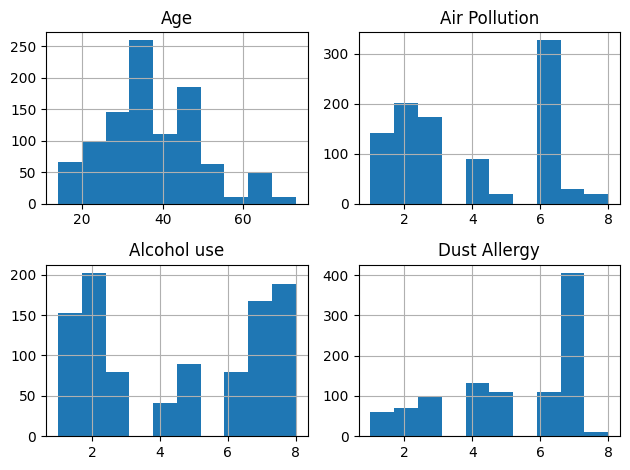

In [ ]:
viz=df[["Age", "Air Pollution", "Alcohol use", "Dust Allergy"]]
vis=df[[ "Fatigue", "Weight Loss","Shortness of Breath", "Wheezing"]]
visu=df[["Swallowing Difficulty", "Frequent Cold", "Snoring","OccuPational Hazards"]]
visual=df[["Genetic Risk", "chronic Lung Disease"]]
viz.hist()


plt.tight_layout()

array([[<Axes: title={'center': 'Fatigue'}>,
        <Axes: title={'center': 'Weight Loss'}>],
       [<Axes: title={'center': 'Shortness of Breath'}>,
        <Axes: title={'center': 'Wheezing'}>]], dtype=object)

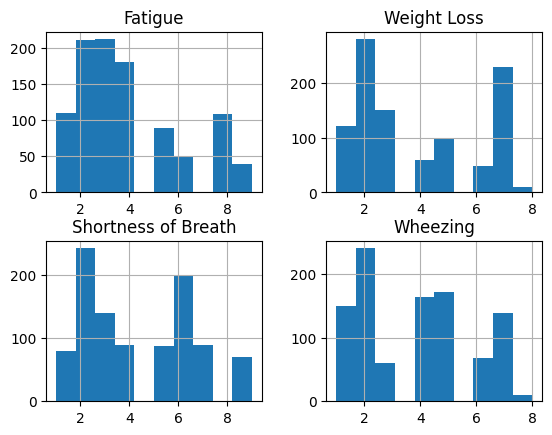

In [ ]:
vis.hist()

array([[<Axes: title={'center': 'Swallowing Difficulty'}>,
        <Axes: title={'center': 'Frequent Cold'}>],
       [<Axes: title={'center': 'Snoring'}>,
        <Axes: title={'center': 'OccuPational Hazards'}>]], dtype=object)

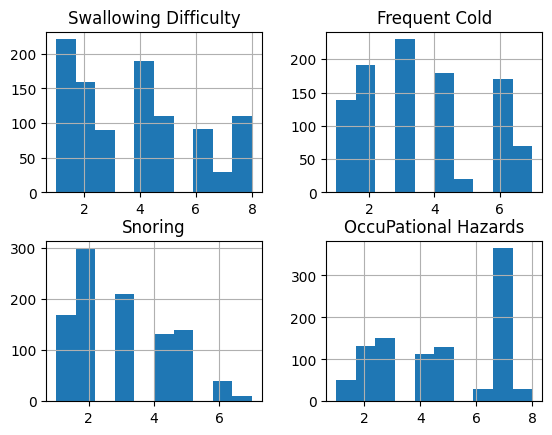

In [ ]:
visu.hist()

array([[<Axes: title={'center': 'Genetic Risk'}>,
        <Axes: title={'center': 'chronic Lung Disease'}>]], dtype=object)

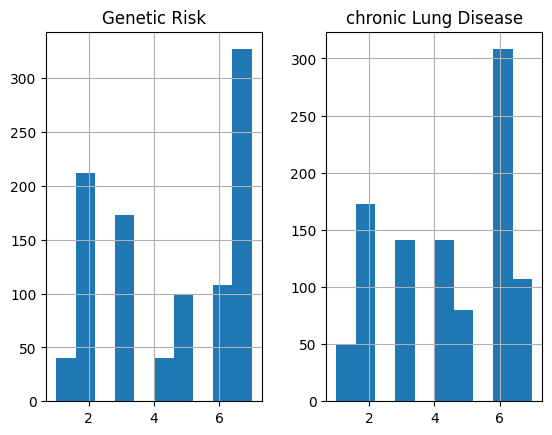

In [ ]:
visual.hist()

Text(0.5, 1.0, 'Alcohol Use')

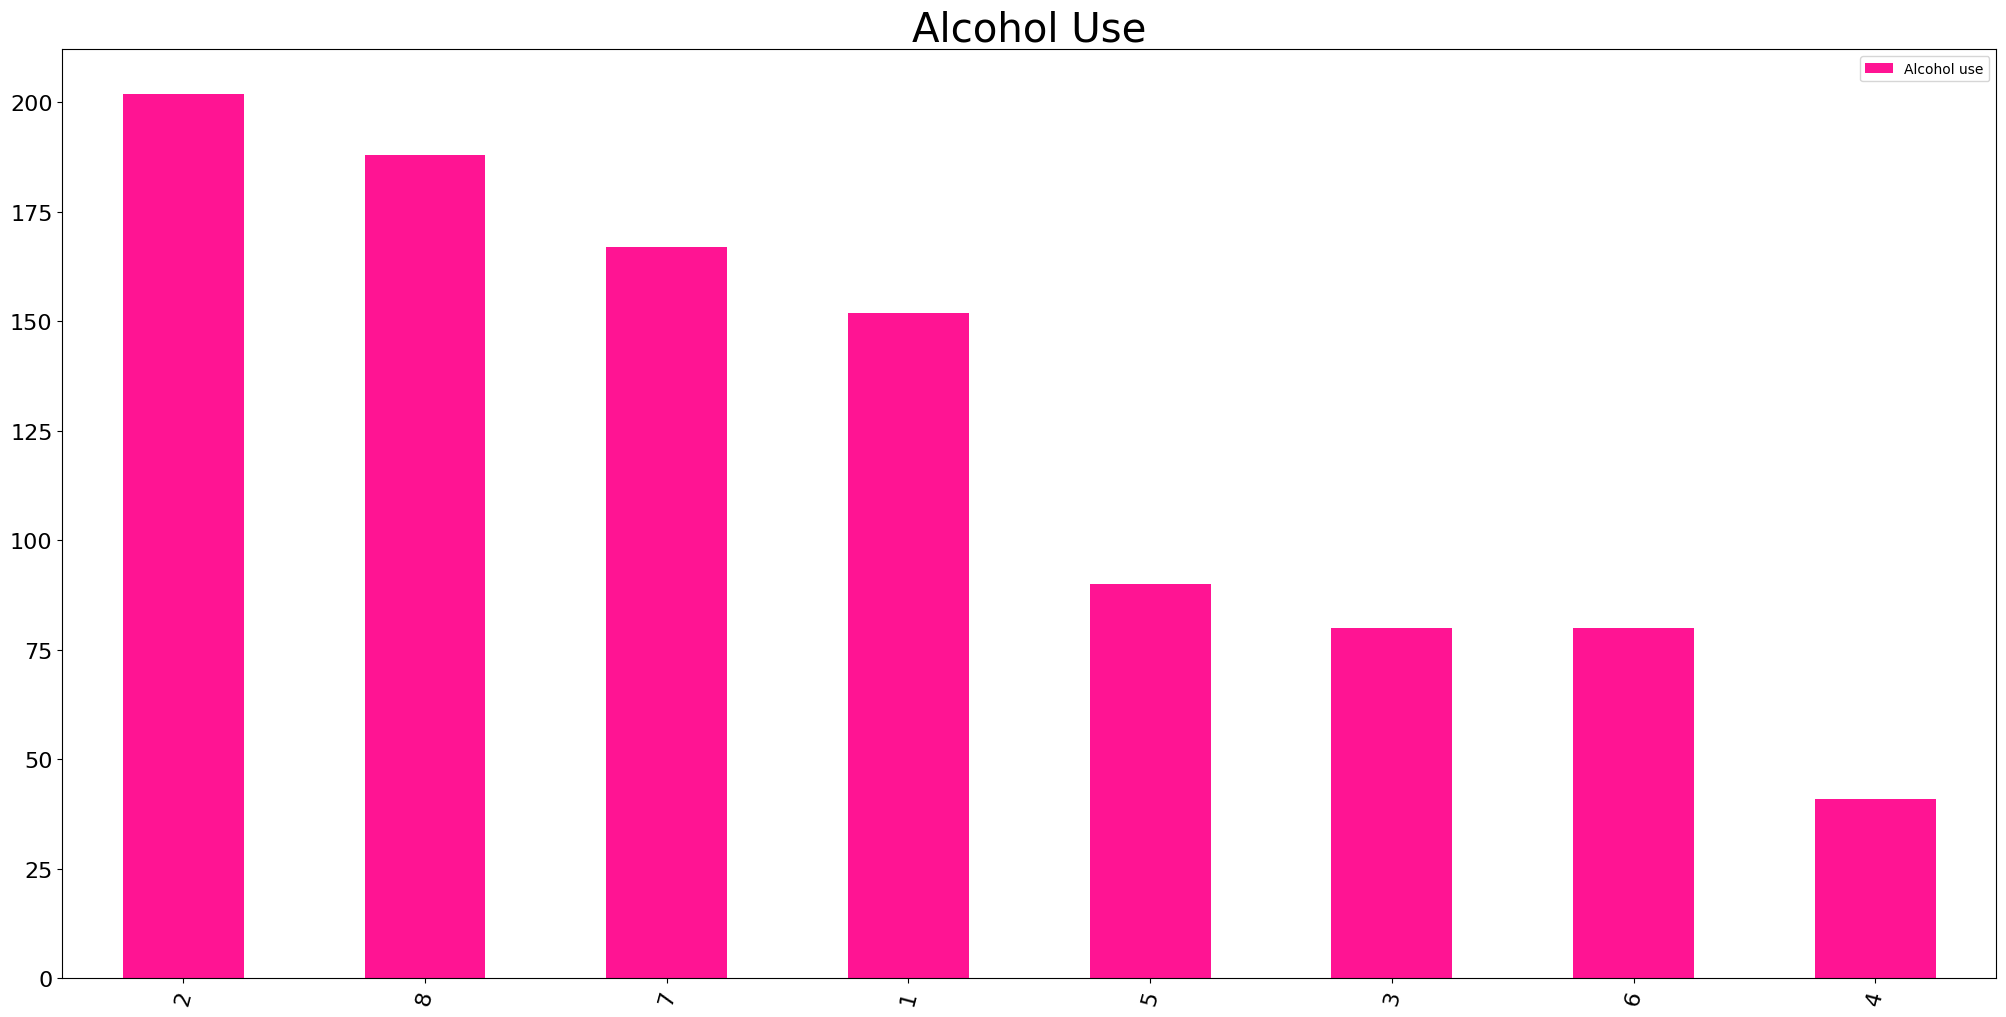

In [ ]:
plt.figure(figsize=(20,10))
df["Alcohol use"].value_counts().plot(kind="bar",color="deeppink",alpha=1,title="Alcohol use")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Alcohol Use",fontsize=29)



Text(0.5, 1.0, 'chronic Lung Disease')

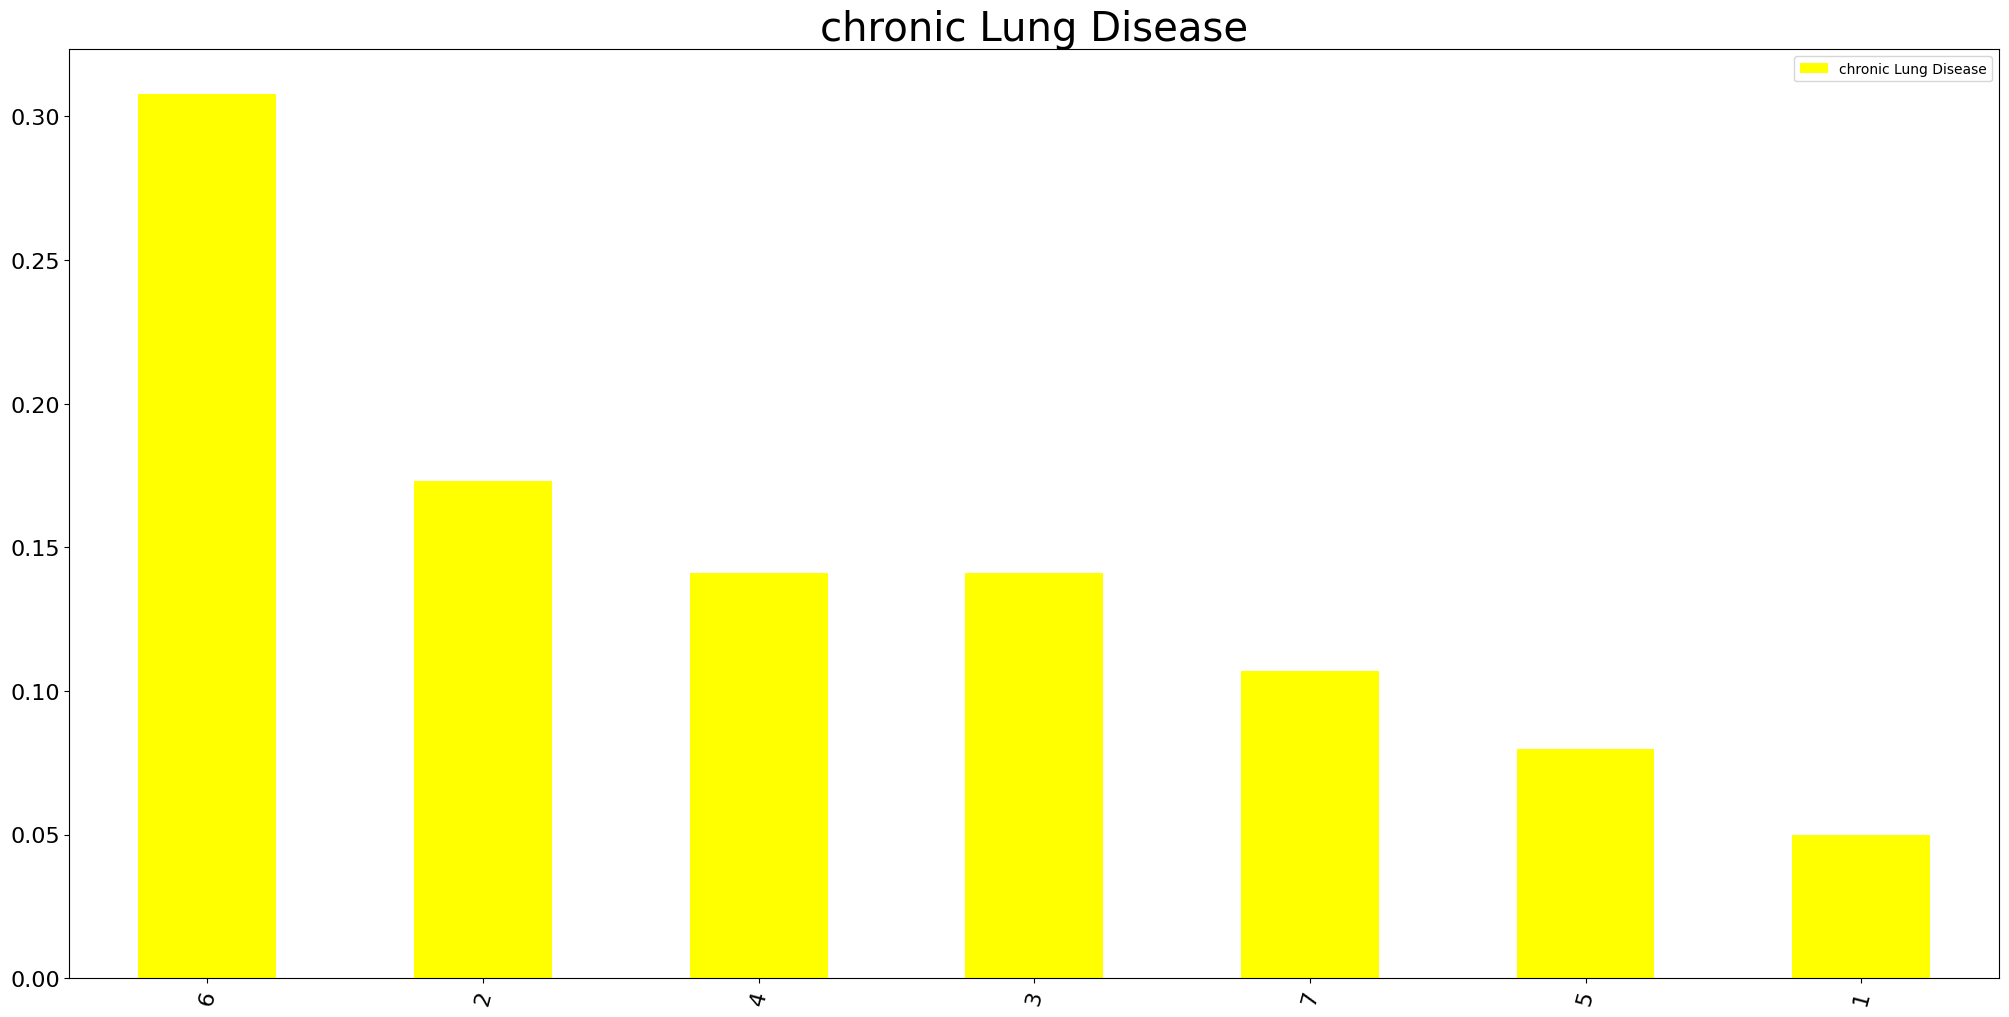

In [ ]:
plt.figure(figsize=(20,10))
df["chronic Lung Disease"].value_counts(normalize=True).plot(kind="bar",color="yellow",alpha=1,title="chronic Lung Disease")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("chronic Lung Disease",fontsize=29)


Text(0.5, 1.0, 'Dust Allergy')

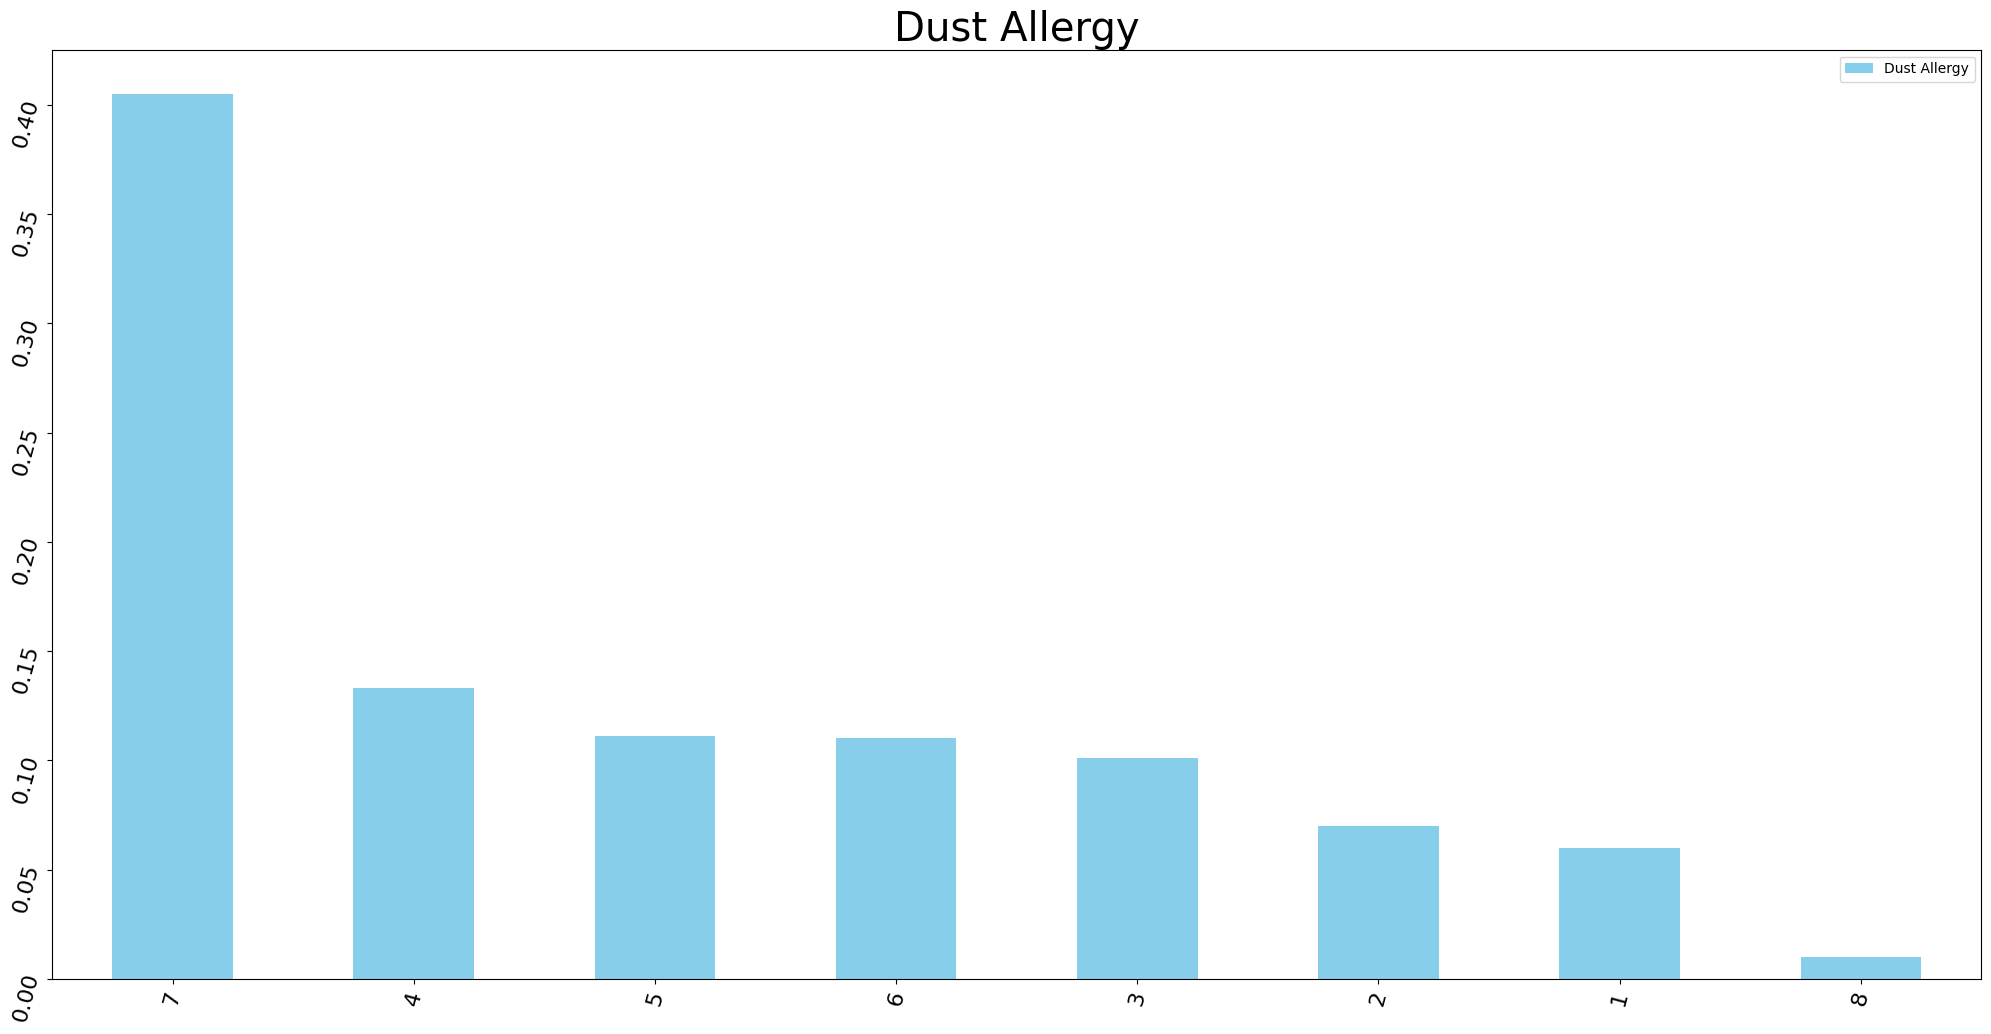

In [ ]:
plt.figure(figsize=(20,10))
df["Dust Allergy"].value_counts(normalize=True).plot(kind="bar",color="skyblue",alpha=1,title="Alcohol use")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(rotation=75,fontsize=16)
plt.title("Dust Allergy",fontsize=29)


Text(0.5, 1.0, 'Fatigue')

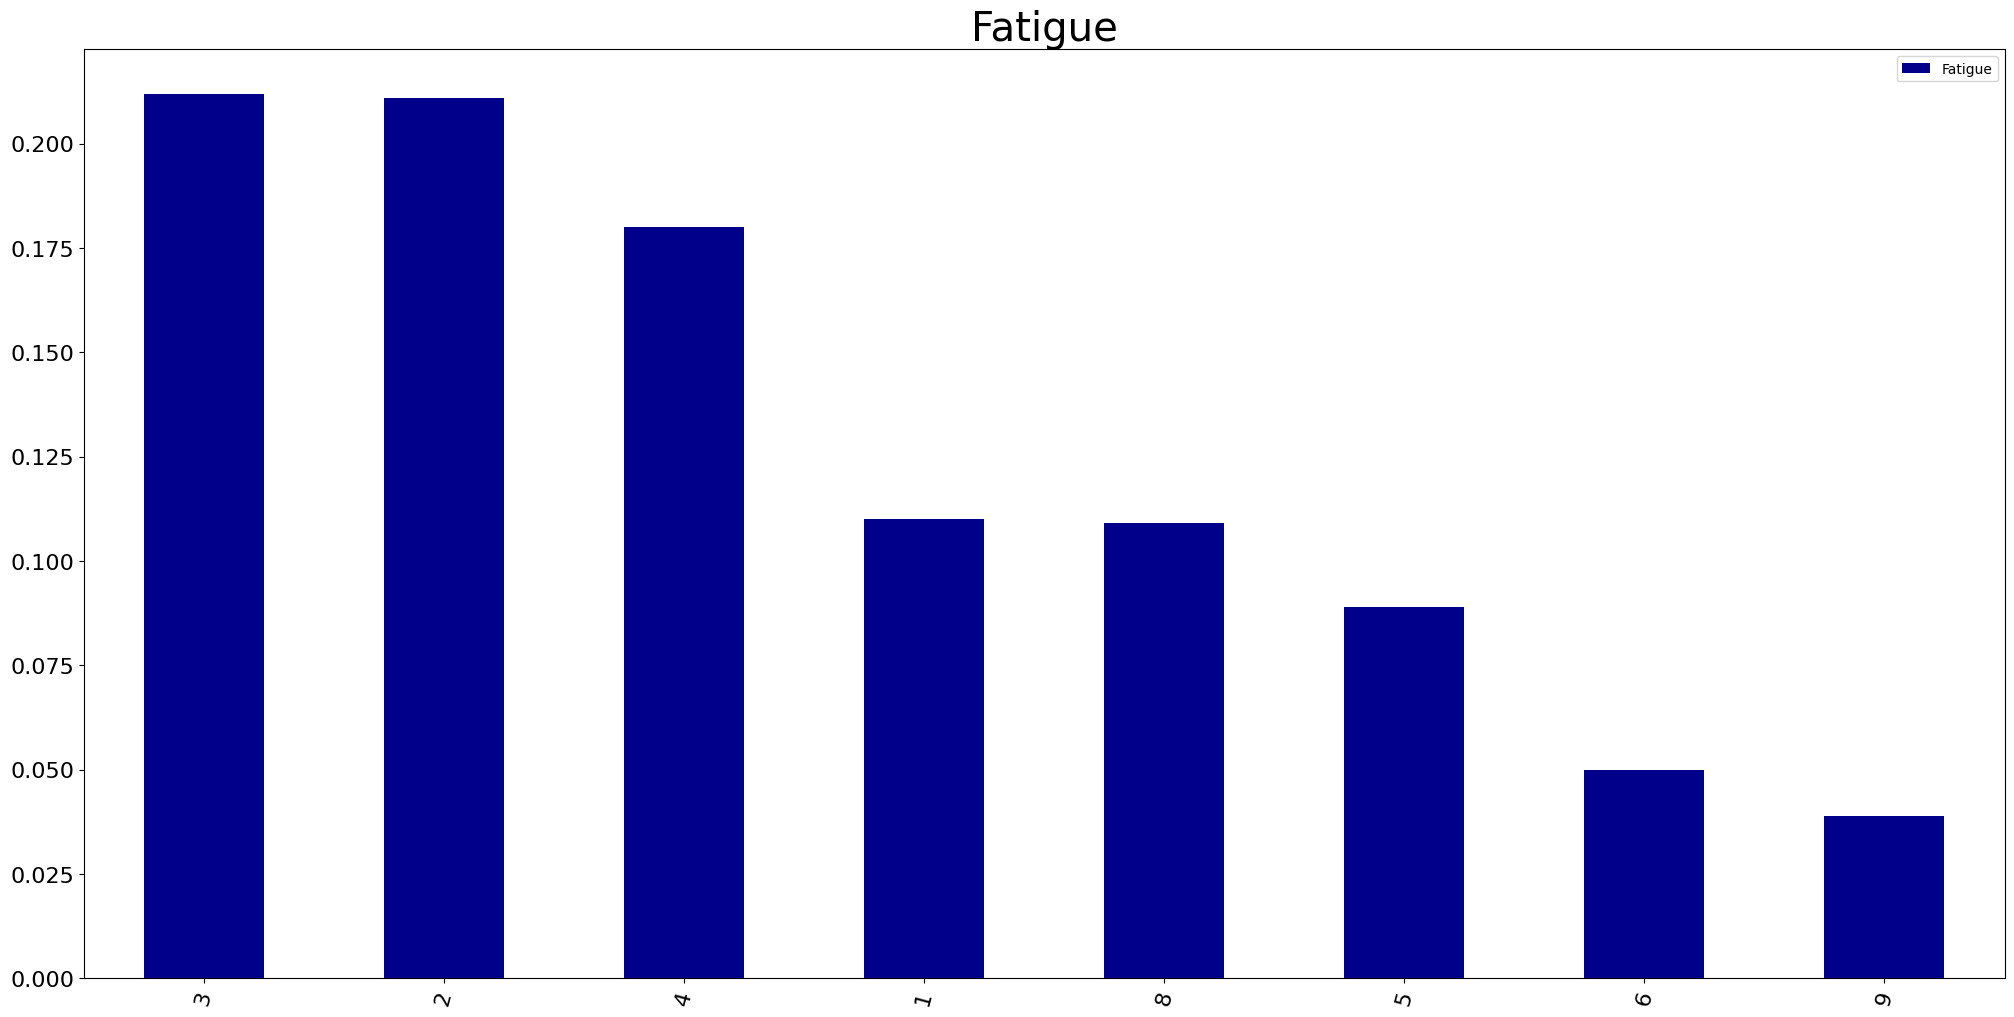

In [ ]:


plt.figure(figsize=(20,10))
df["Fatigue"].value_counts(normalize=True).plot(kind="bar",color="darkblue",alpha=1,title="Fatigue")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Fatigue",fontsize=29)


Text(0.5, 1.0, 'Weight Loss')

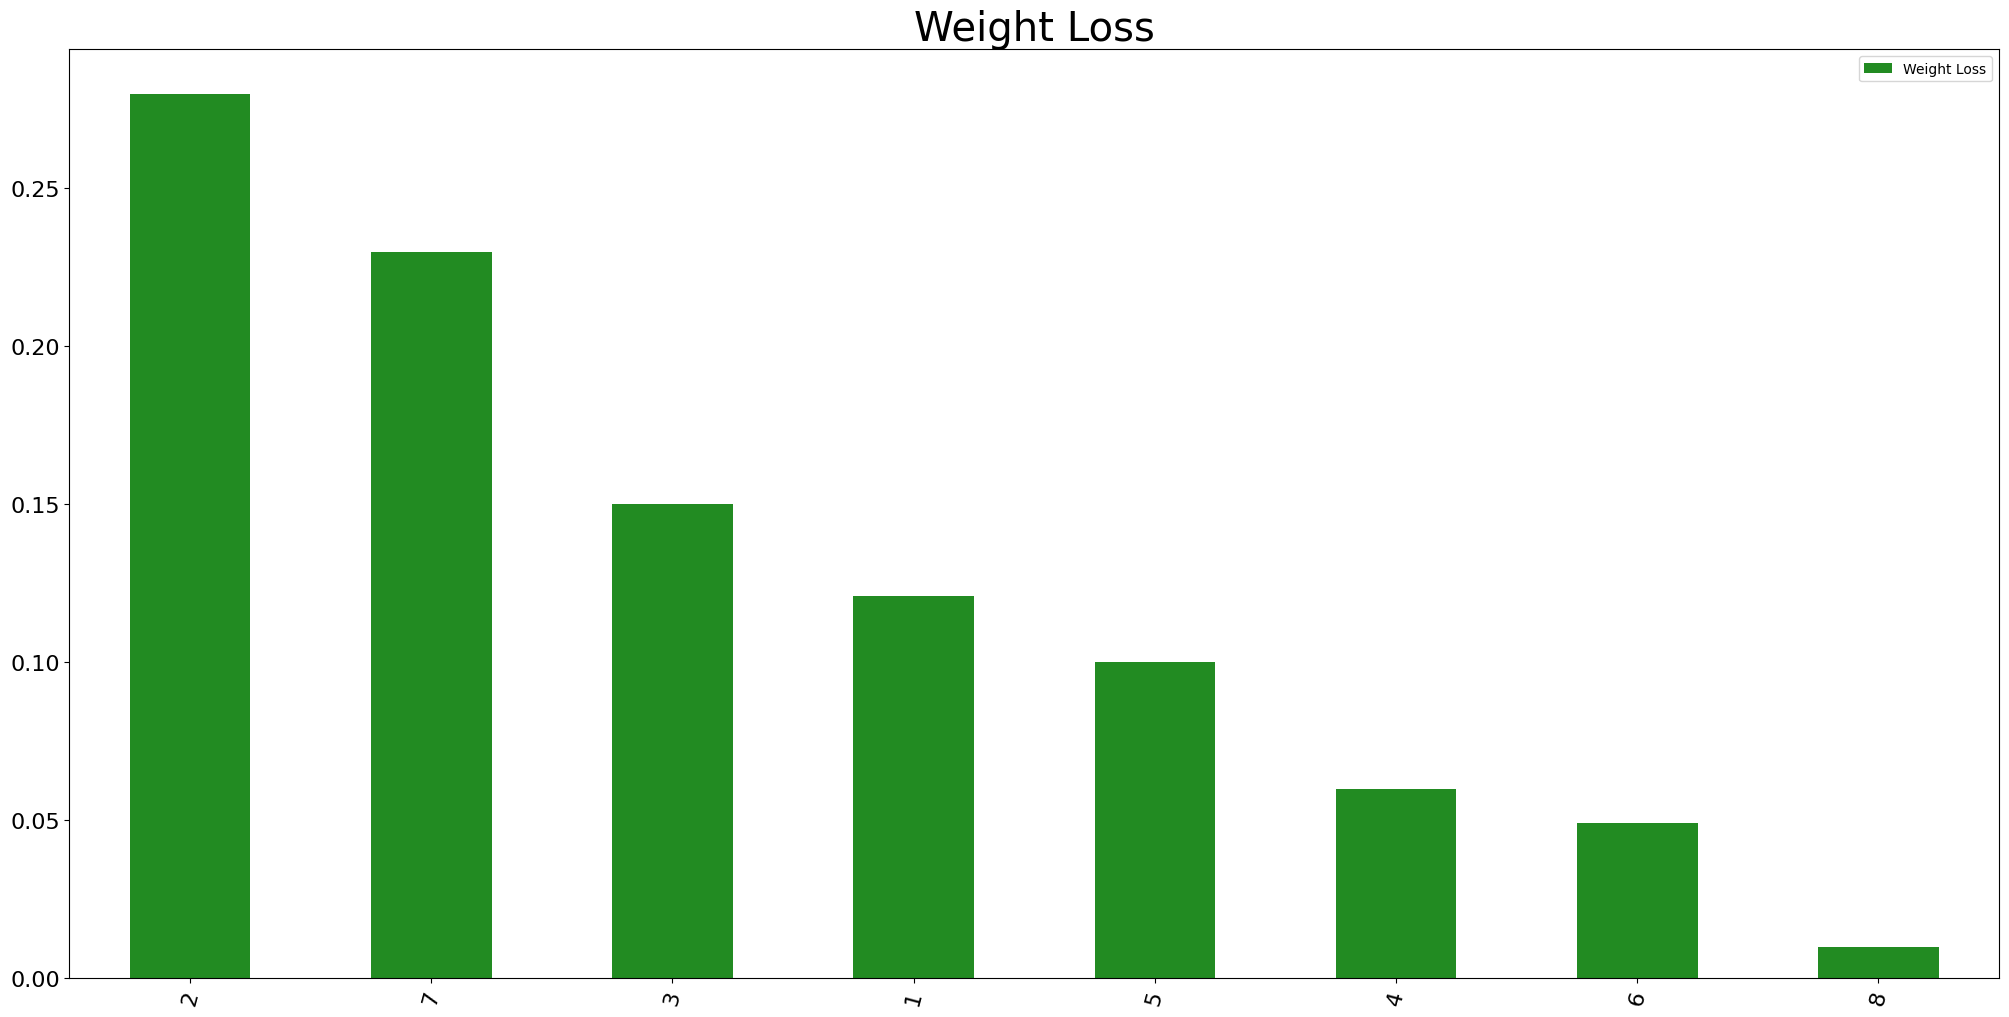

In [ ]:


plt.figure(figsize=(20,10))
df["Weight Loss"].value_counts(normalize=True).plot(kind="bar",color="forestgreen",alpha=1,title="Weight Loss")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Weight Loss",fontsize=29)


Text(0.5, 1.0, 'Chest Pain')

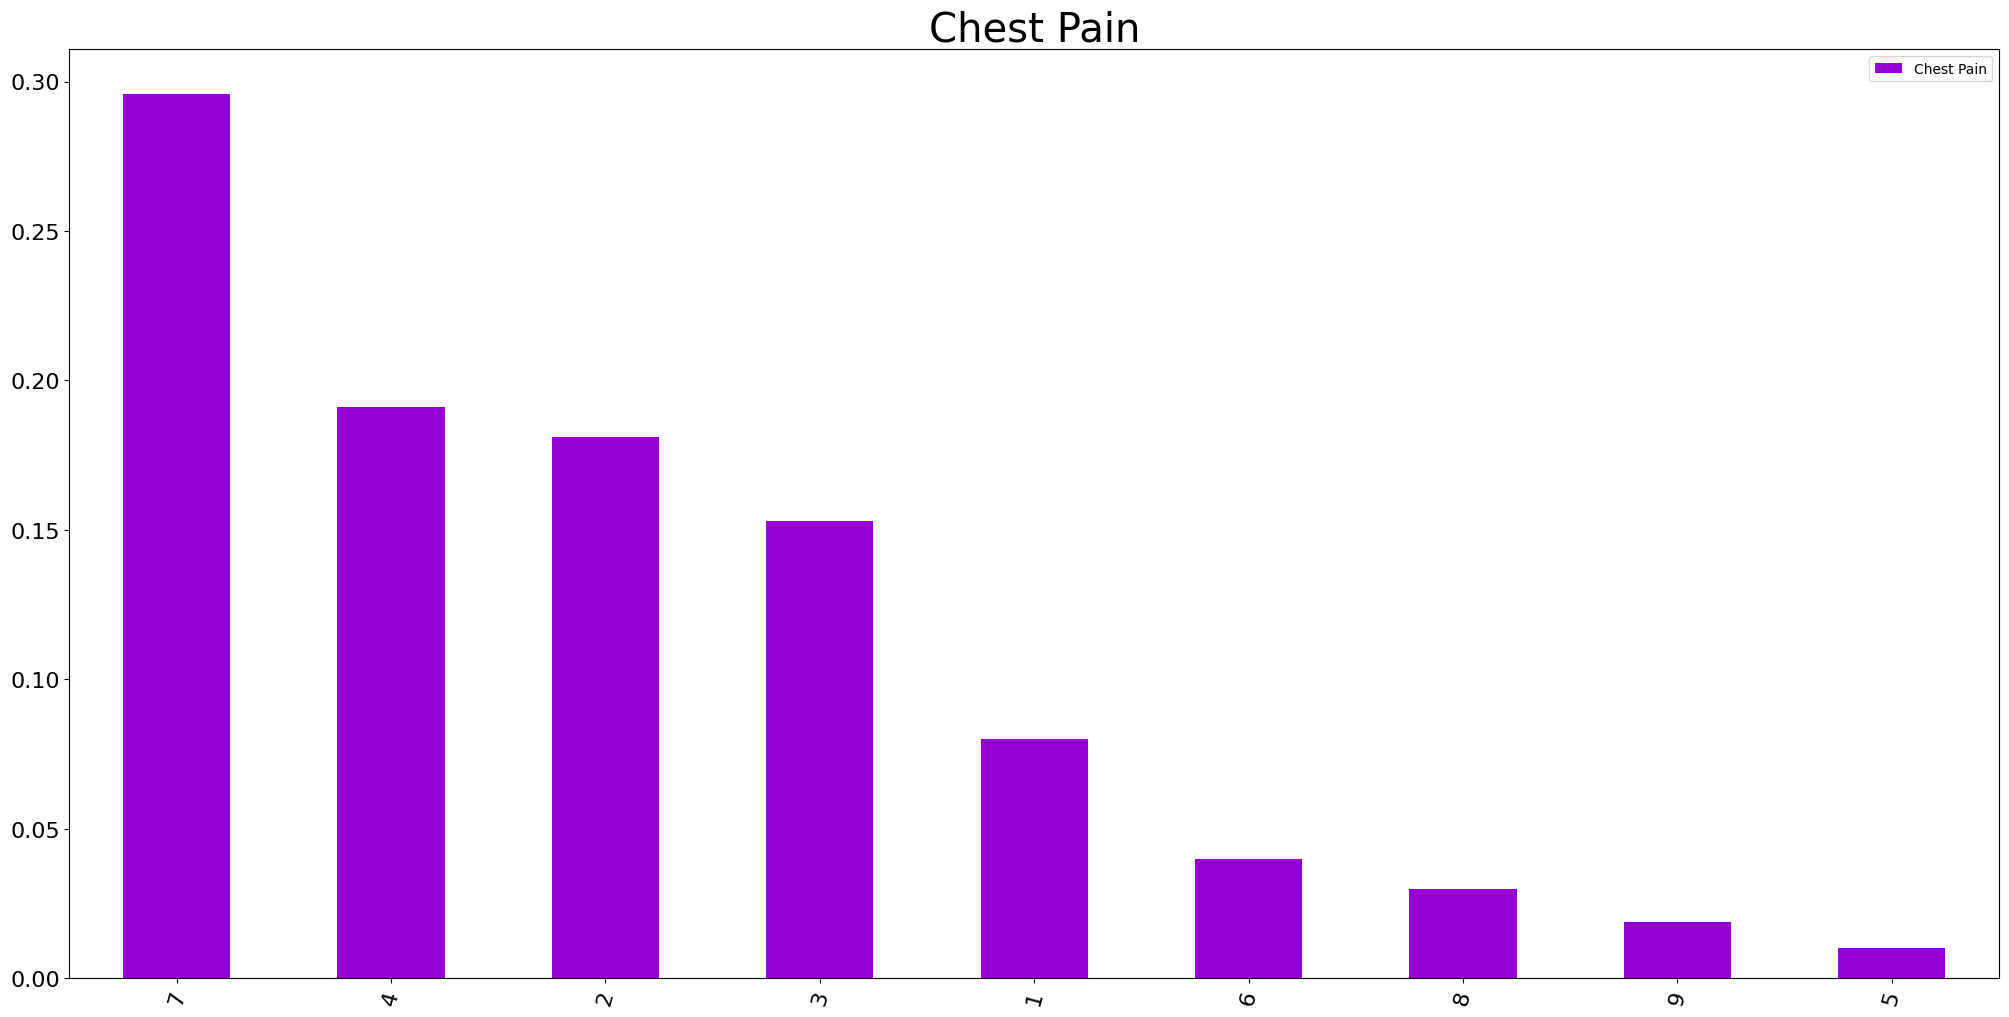

In [ ]:
plt.figure(figsize=(20,10))
df["Chest Pain"].value_counts(normalize=True).plot(kind="bar",color="darkviolet",alpha=1,title="Chest Pain")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Chest Pain",fontsize=29)


Text(0.5, 1.0, 'Shortness of Breath')

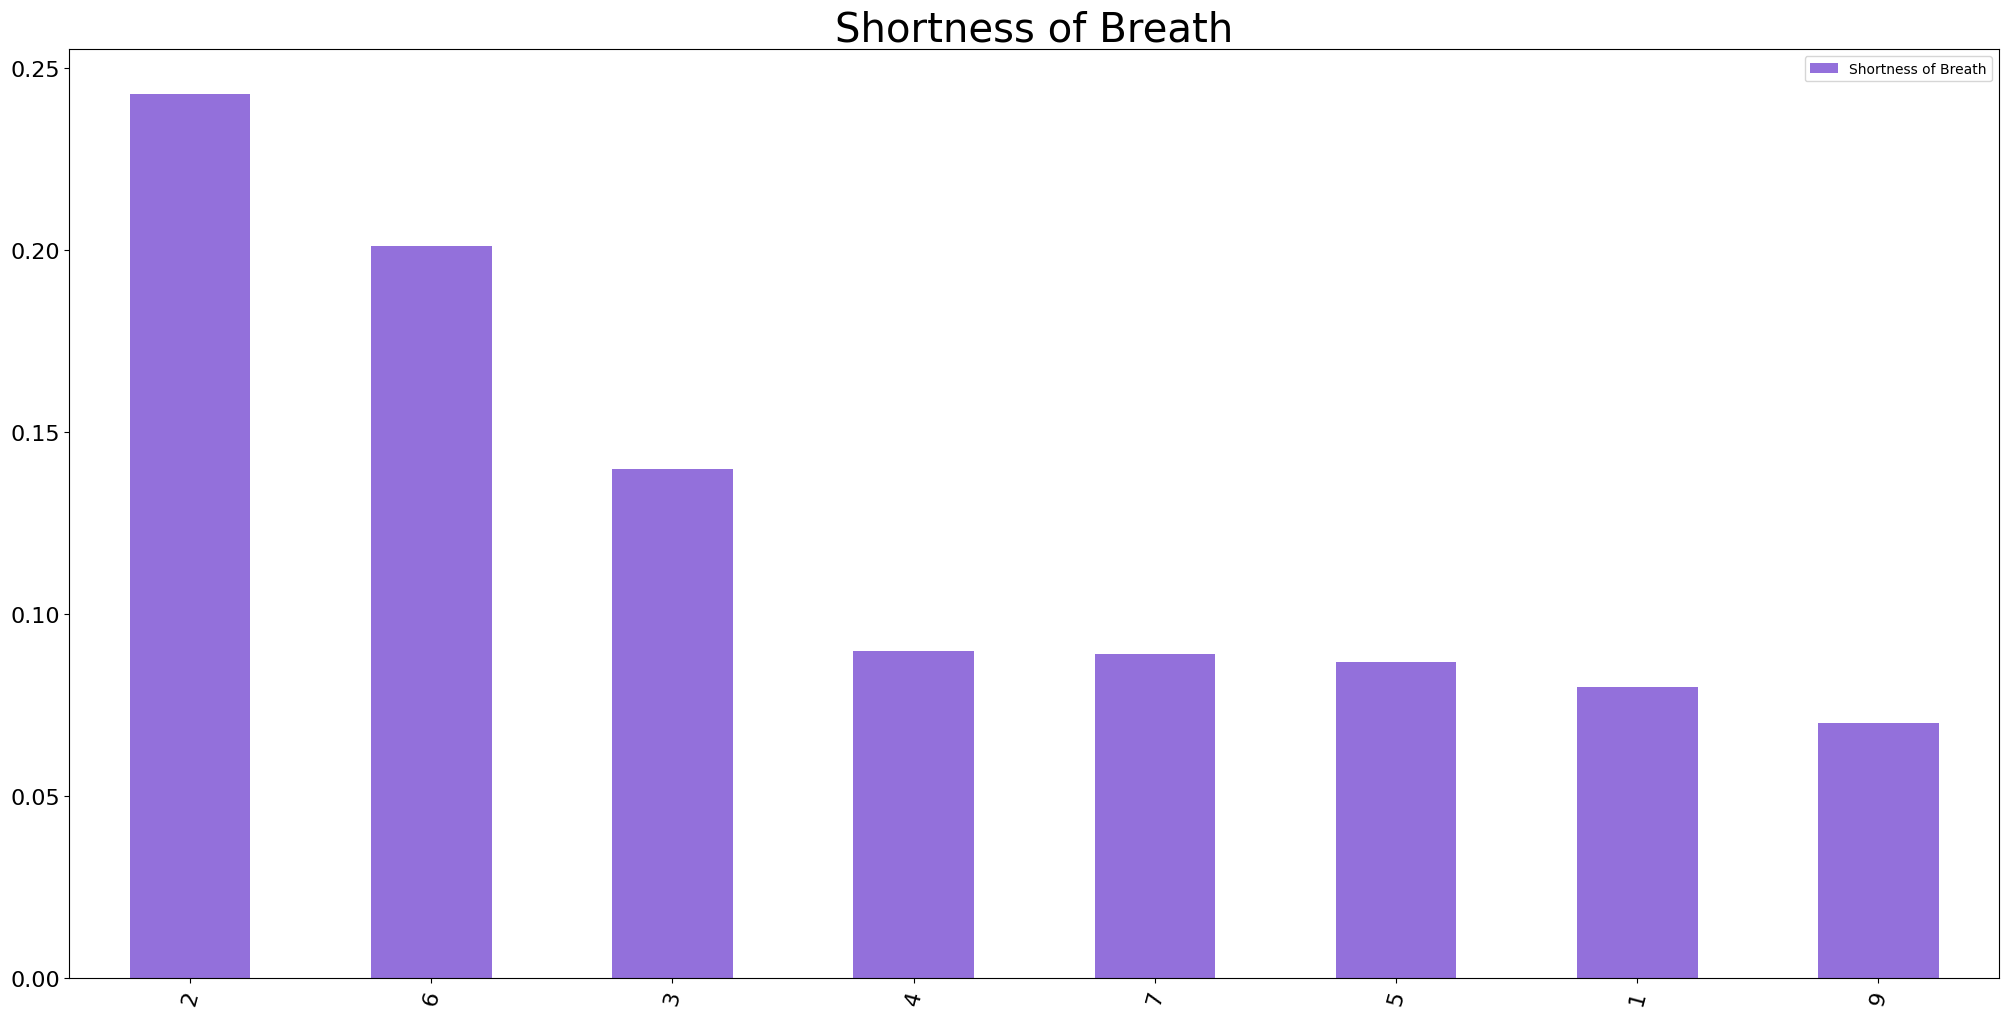

In [ ]:
plt.figure(figsize=(20,10))
df["Shortness of Breath"].value_counts(normalize=True).plot(kind="bar",color="mediumpurple",alpha=1,title="Shortness of Breath")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Shortness of Breath",fontsize=29)


Text(0.5, 1.0, 'Wheezing')

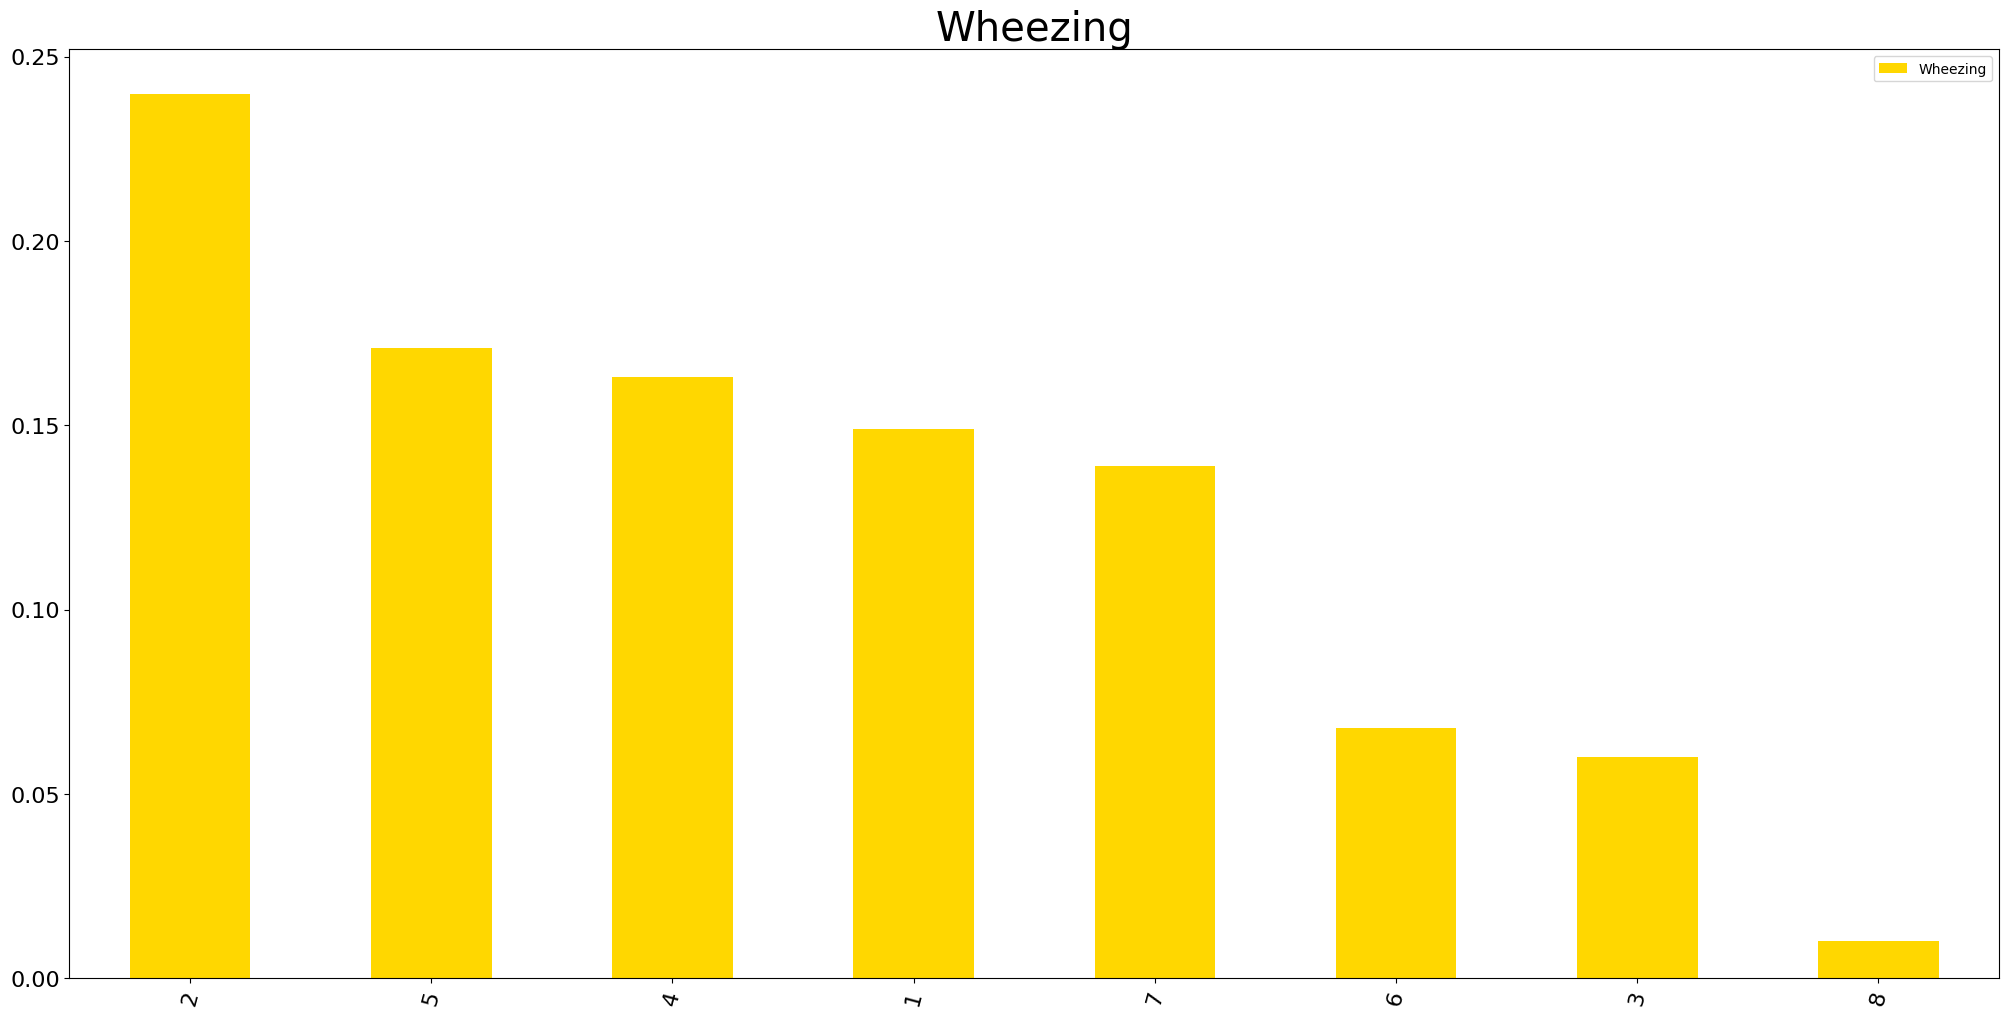

In [ ]:
plt.figure(figsize=(20,10))
df["Wheezing"].value_counts(normalize=True).plot(kind="bar",color="gold",alpha=1,title="Wheezing")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Wheezing",fontsize=29)


Text(0.5, 1.0, 'Frequent Cold')

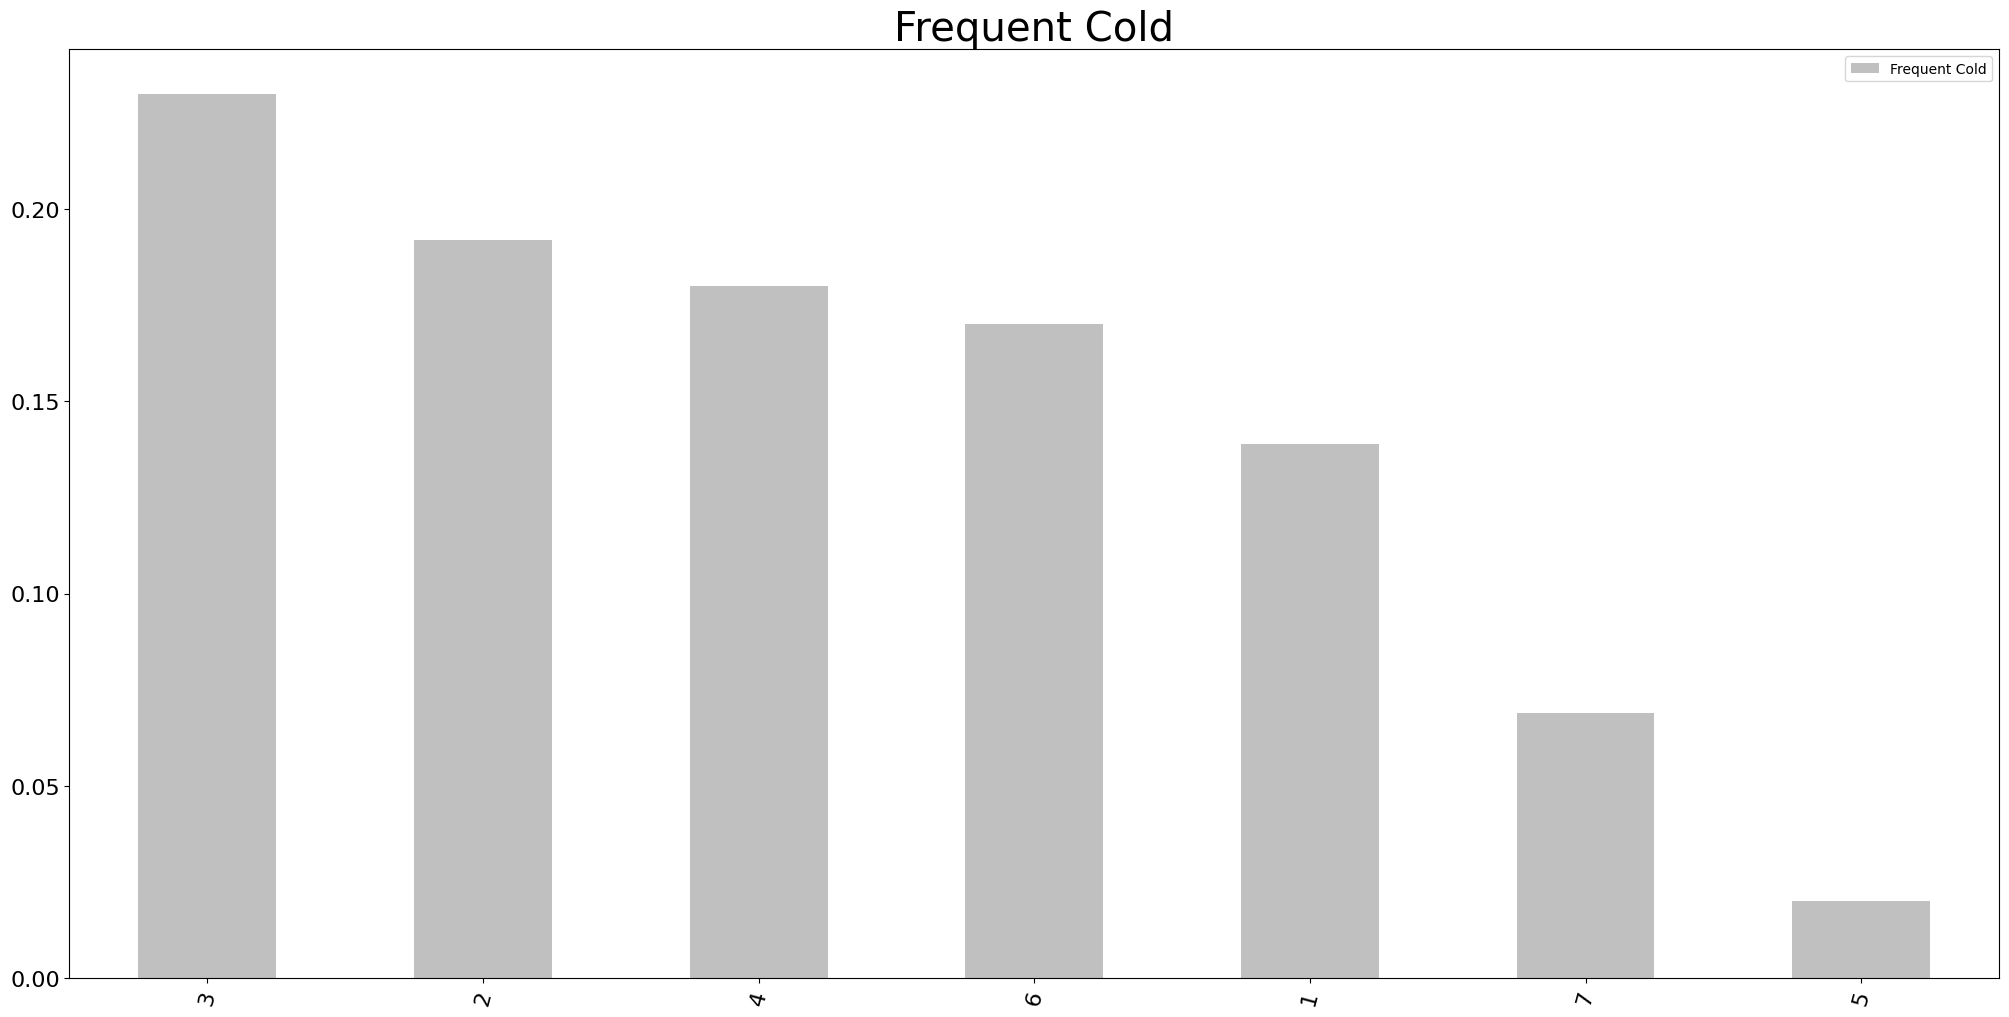

In [ ]:
plt.figure(figsize=(20,10))
df["Frequent Cold"].value_counts(normalize=True).plot(kind="bar",color="silver",alpha=1,title="Frequent Cold")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Frequent Cold",fontsize=29)



Text(0.5, 1.0, 'Snoring')

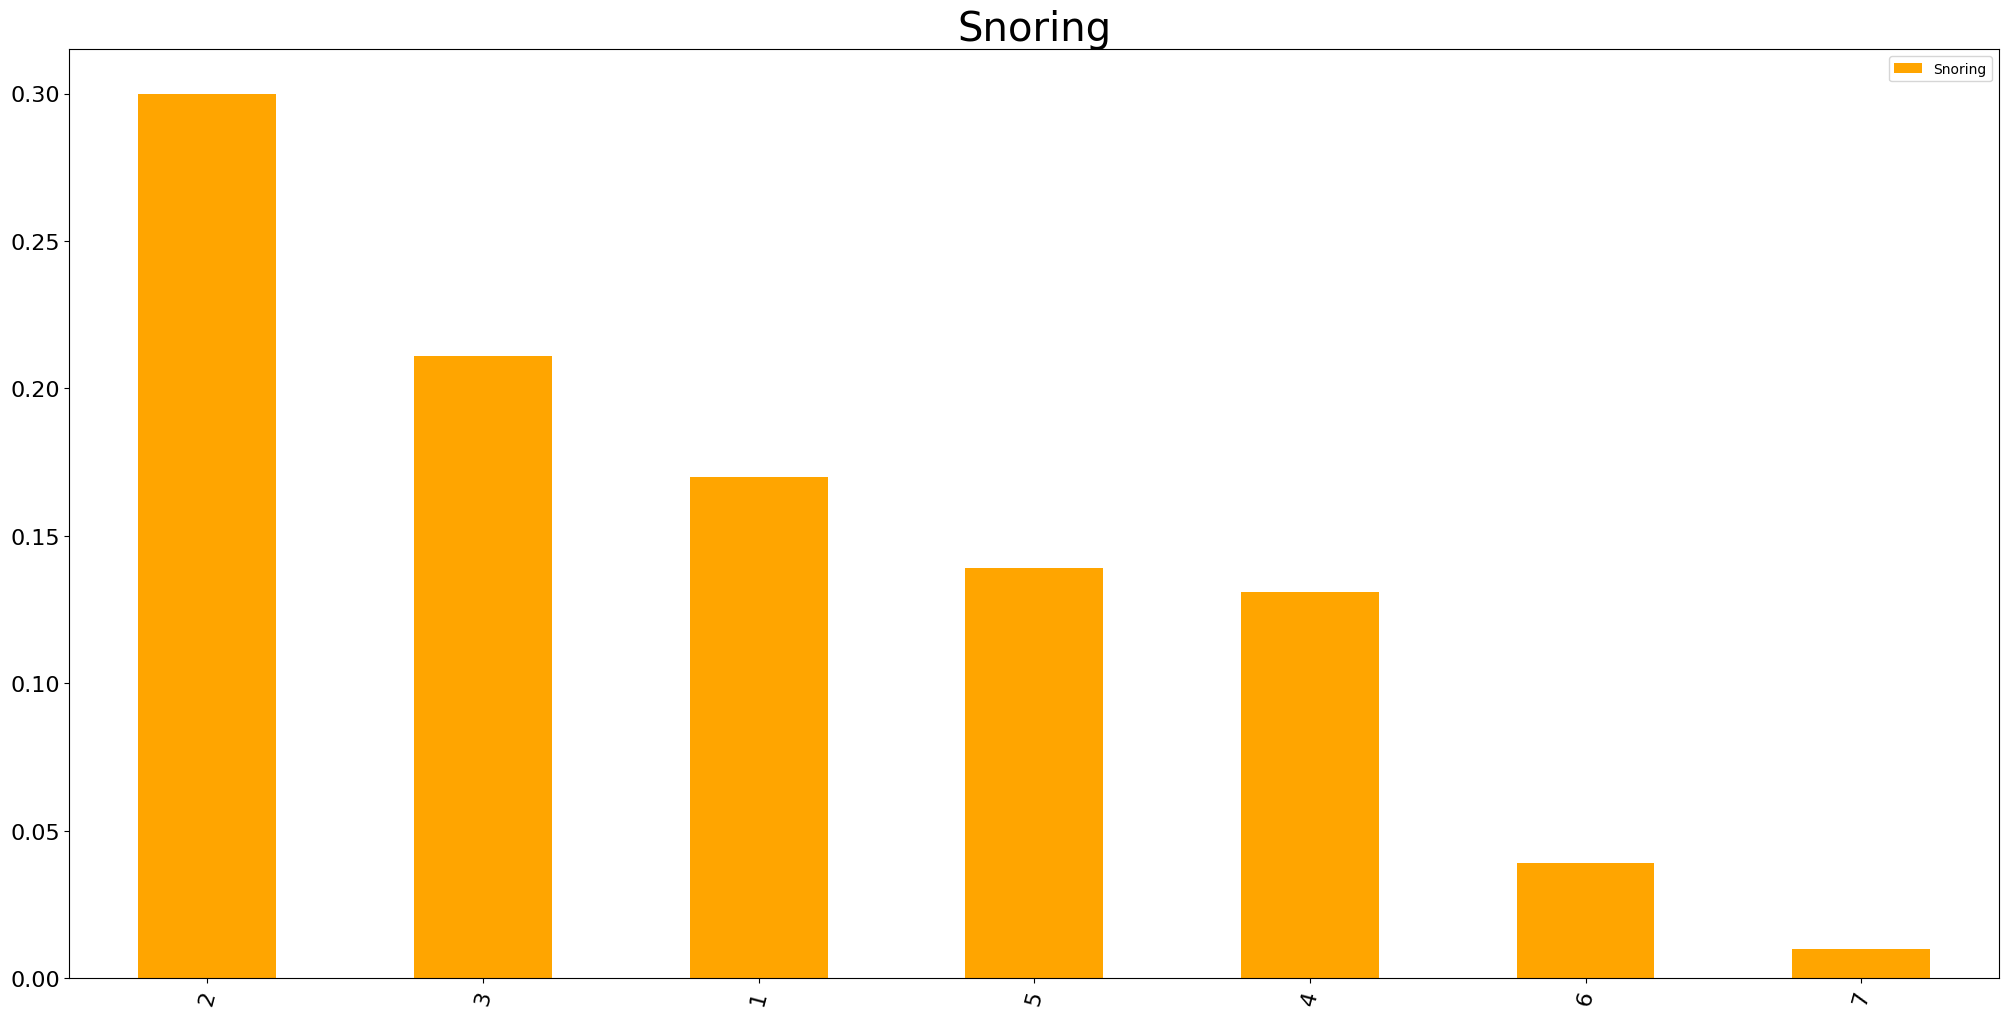

In [ ]:
plt.figure(figsize=(20,10))
df["Snoring"].value_counts(normalize=True).plot(kind="bar",color="orange",alpha=1,title="Snoring")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Snoring",fontsize=29)



Text(0.5, 1.0, 'OccuPational Hazards')

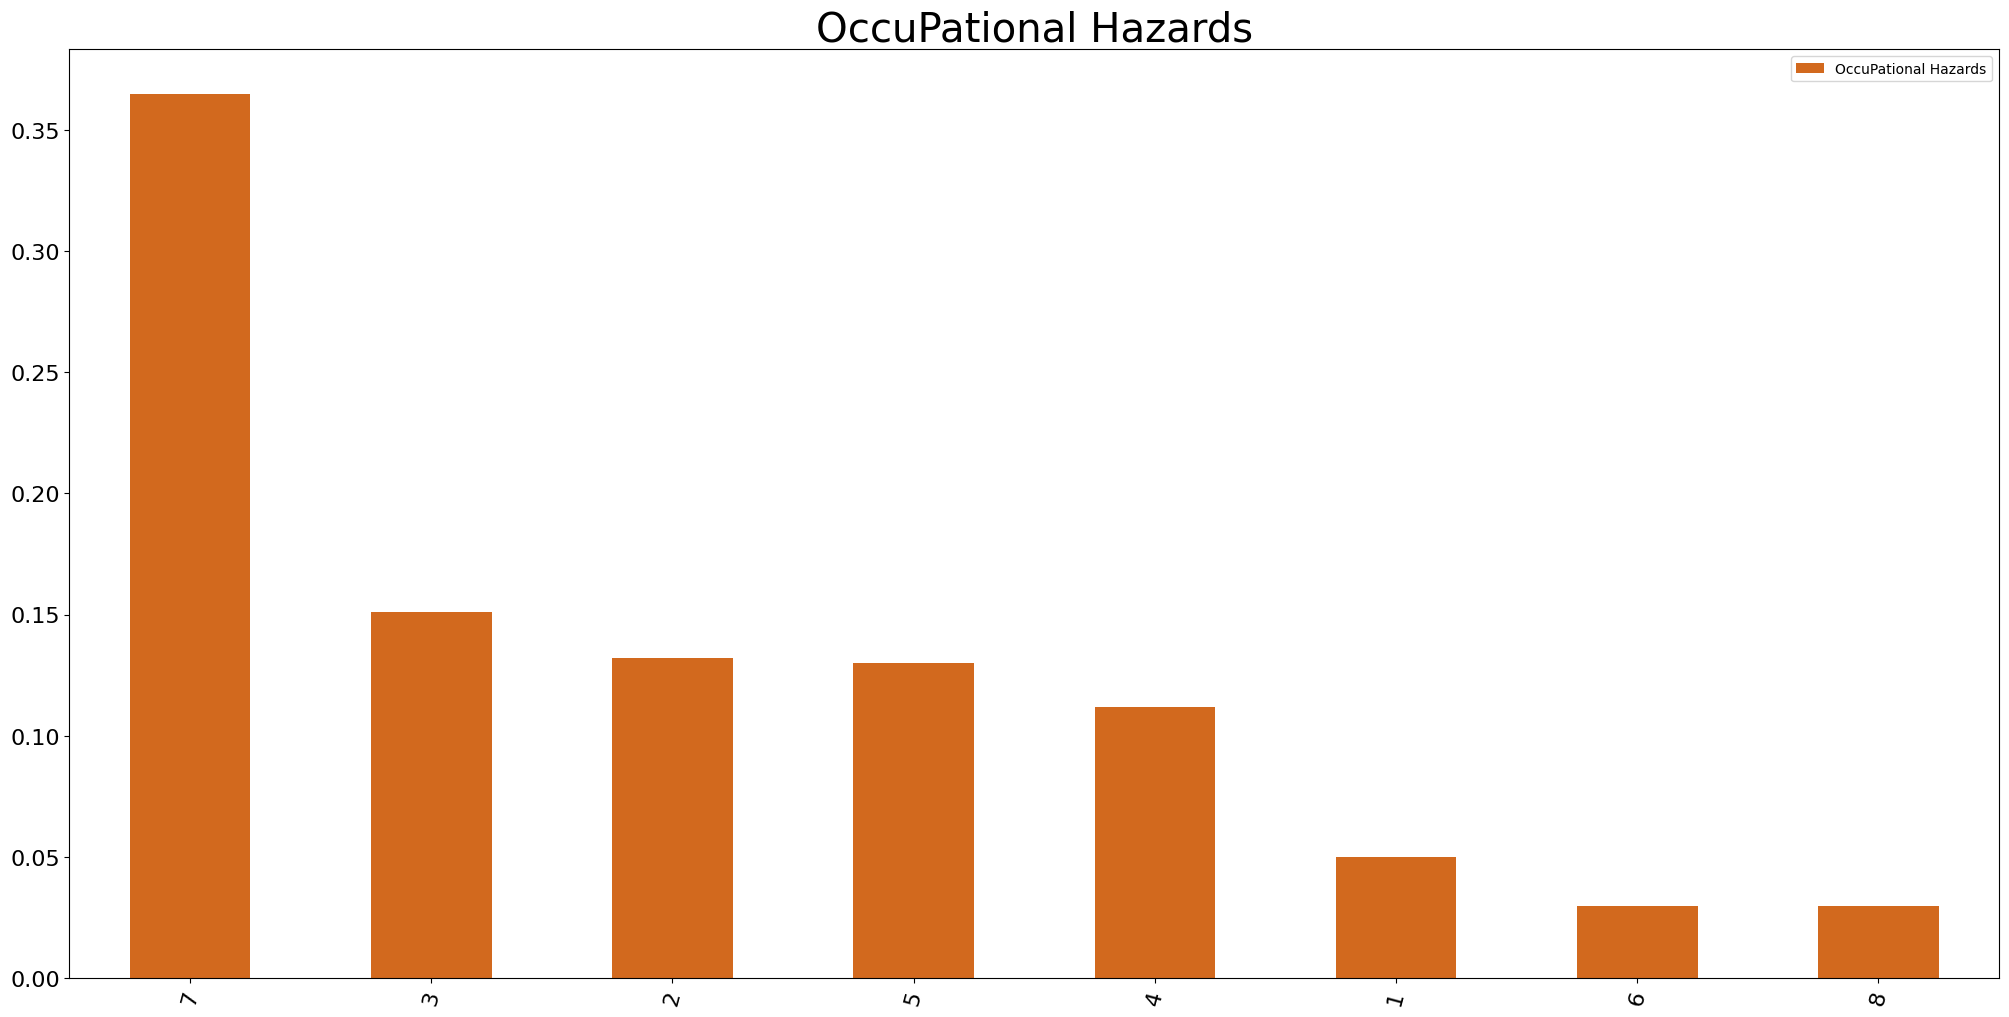

In [ ]:
plt.figure(figsize=(20,10))
df["OccuPational Hazards"].value_counts(normalize=True).plot(kind="bar",color="chocolate",alpha=1,title="OccuPational Hazards")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("OccuPational Hazards",fontsize=29)



Text(0.5, 1.0, 'Genetic Risk')

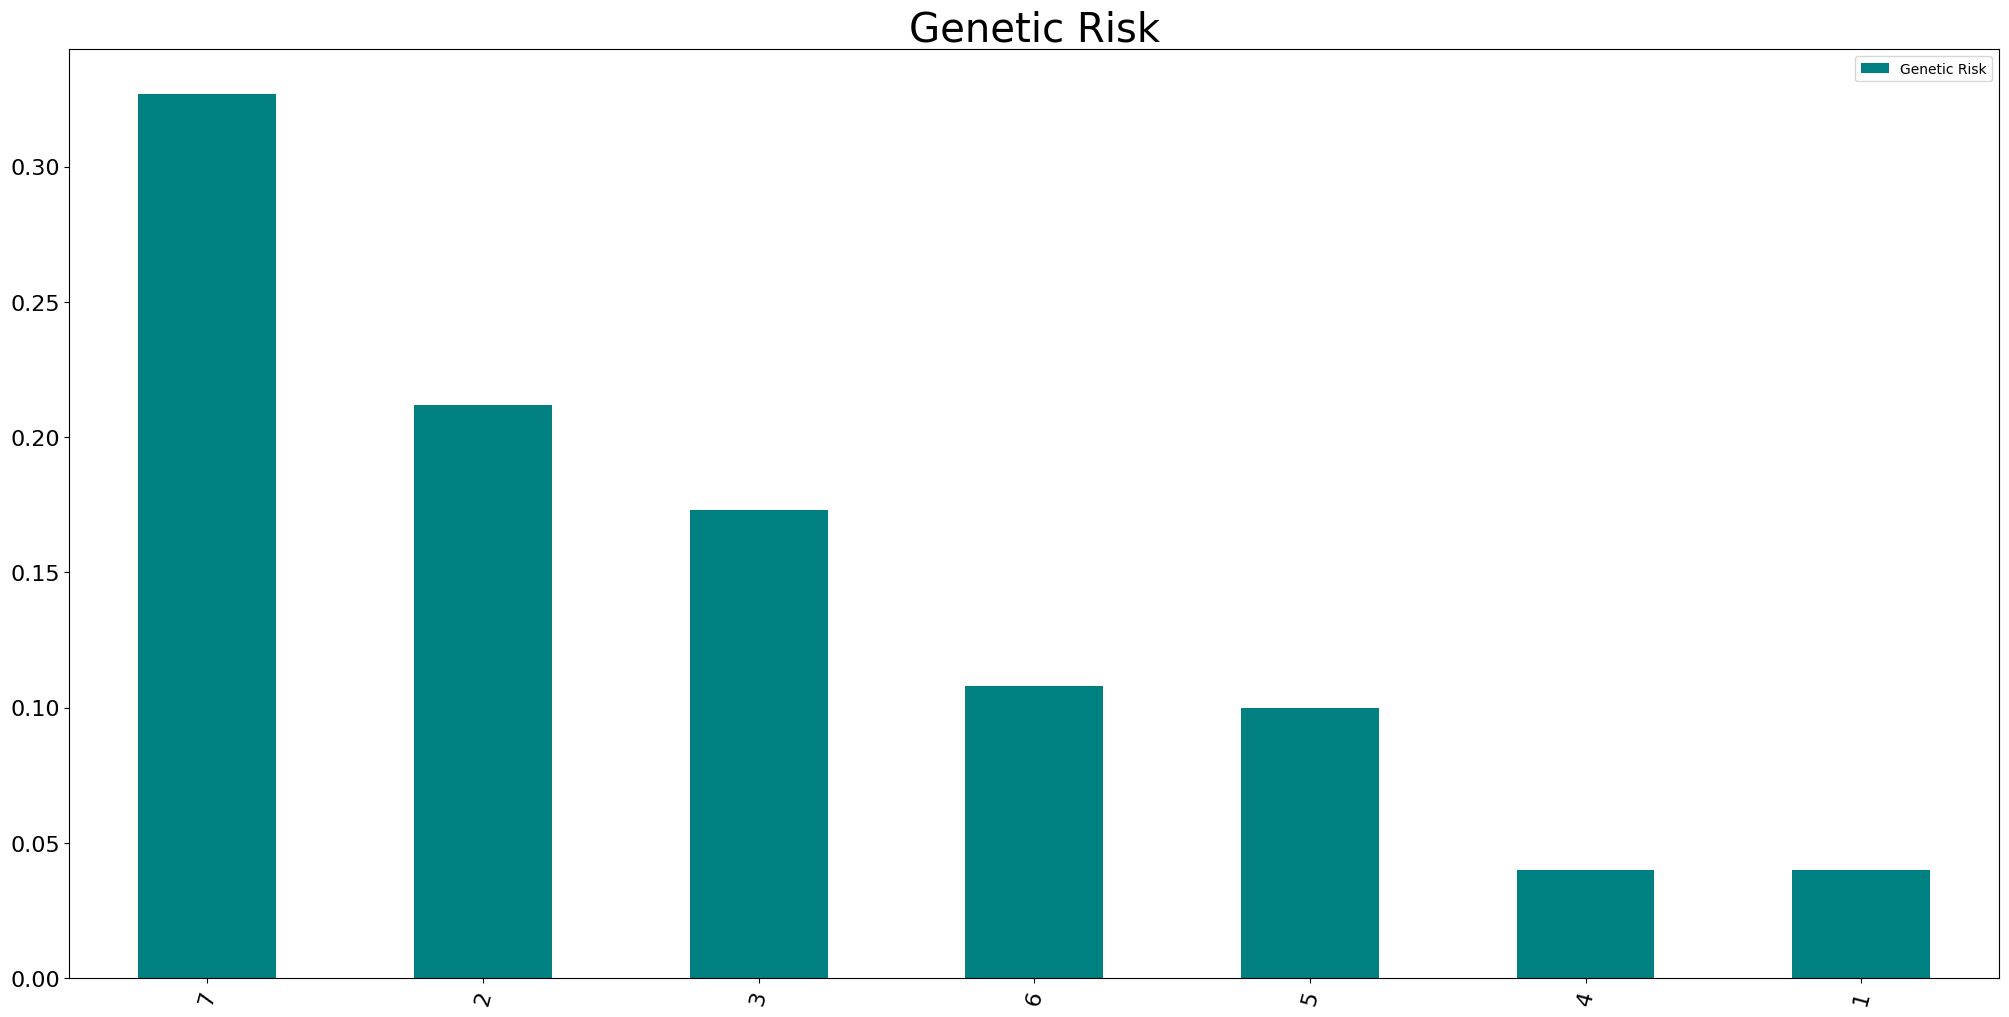

In [ ]:
plt.figure(figsize=(20,10))
df["Genetic Risk"].value_counts(normalize=True).plot(kind="bar",color="teal",alpha=1,title="Genetic Risk")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Genetic Risk",fontsize=29)



Text(0.5, 1.0, 'Shortness of Breath')

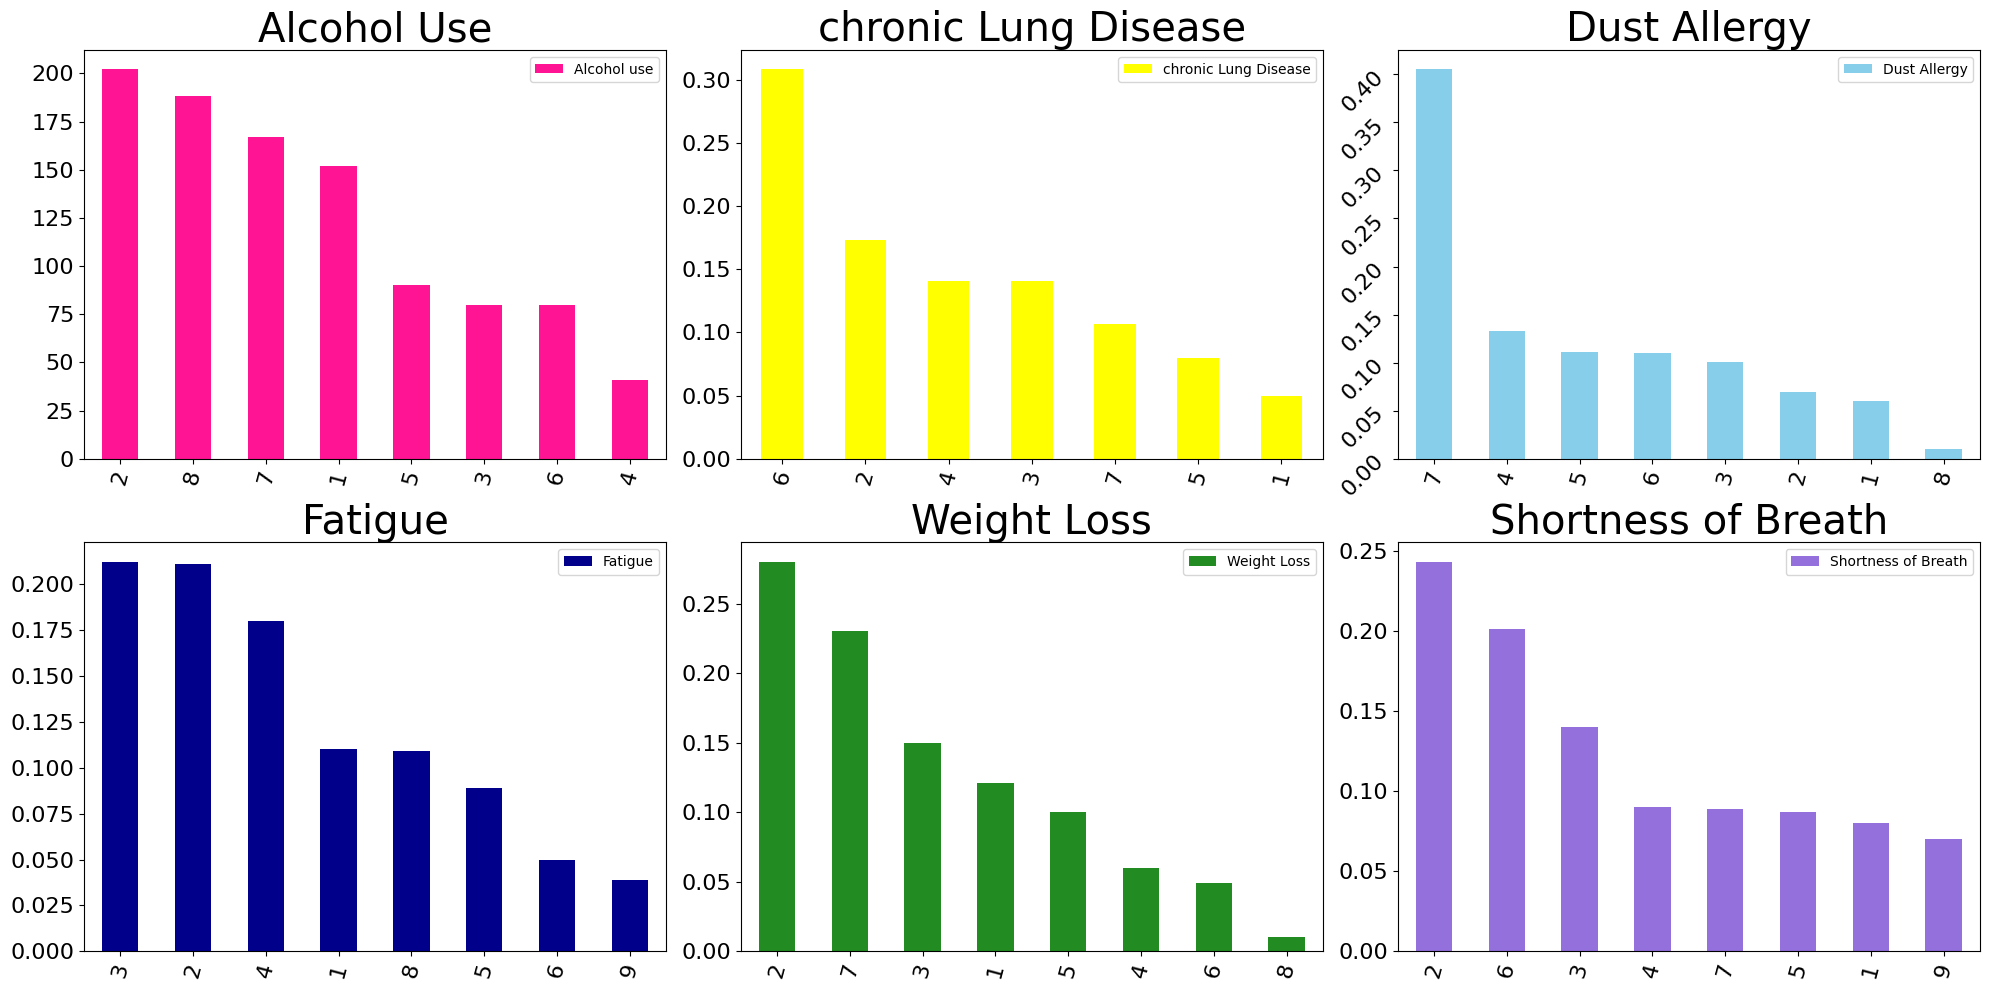

In [ ]:
# prompt: subplot the all bar charts above

plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
df["Alcohol use"].value_counts().plot(kind="bar",color="deeppink",alpha=1,title="Alcohol use")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Alcohol Use",fontsize=29)

plt.subplot(2,3,2)
df["chronic Lung Disease"].value_counts(normalize=True).plot(kind="bar",color="yellow",alpha=1,title="chronic Lung Disease")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("chronic Lung Disease",fontsize=29)

plt.subplot(2,3,3)
df["Dust Allergy"].value_counts(normalize=True).plot(kind="bar",color="skyblue",alpha=1,title="Alcohol use")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(rotation=45,fontsize=16)
plt.title("Dust Allergy",fontsize=29)

plt.subplot(2,3,4)
df["Fatigue"].value_counts(normalize=True).plot(kind="bar",color="darkblue",alpha=1,title="Fatigue")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Fatigue",fontsize=29)

plt.subplot(2,3,5)
df["Weight Loss"].value_counts(normalize=True).plot(kind="bar",color="forestgreen",alpha=1,title="Weight Loss")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Weight Loss",fontsize=29)

plt.subplot(2,3,6)
df["Shortness of Breath"].value_counts(normalize=True).plot(kind="bar",color="mediumpurple",alpha=1,title="Shortness of Breath")
plt.legend()
plt.tight_layout()
plt.xticks(rotation=75,fontsize=16)
plt.yticks(fontsize=16)
plt.title("Shortness of Breath",fontsize=29)


<Axes: xlabel='Age', ylabel='chronic Lung Disease'>

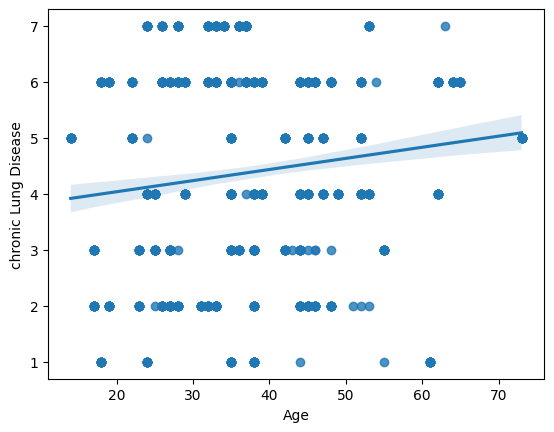

In [ ]:
sns.regplot(x=df["Age"],y=df["chronic Lung Disease"])


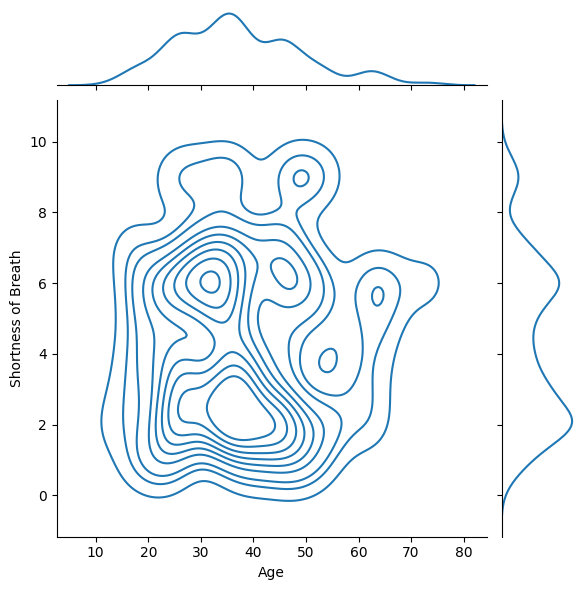

In [ ]:
sns.jointplot(x=df["Age"],y=df["Shortness of Breath"],kind="kde")

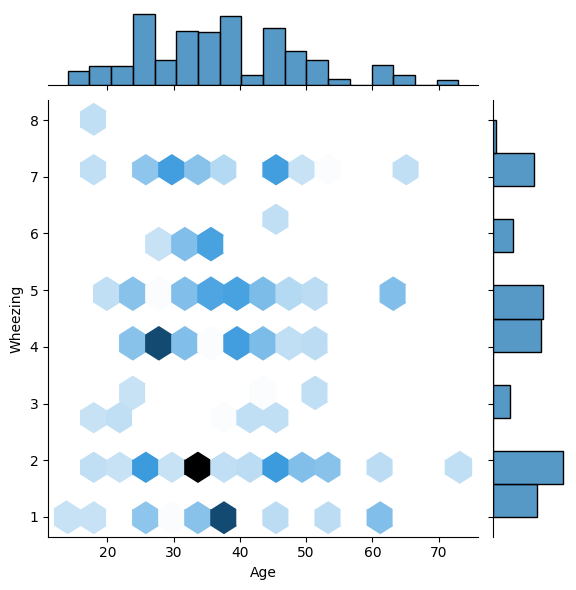

In [ ]:
sns.jointplot(x=df["Age"],y=df["Wheezing"],kind="hex")

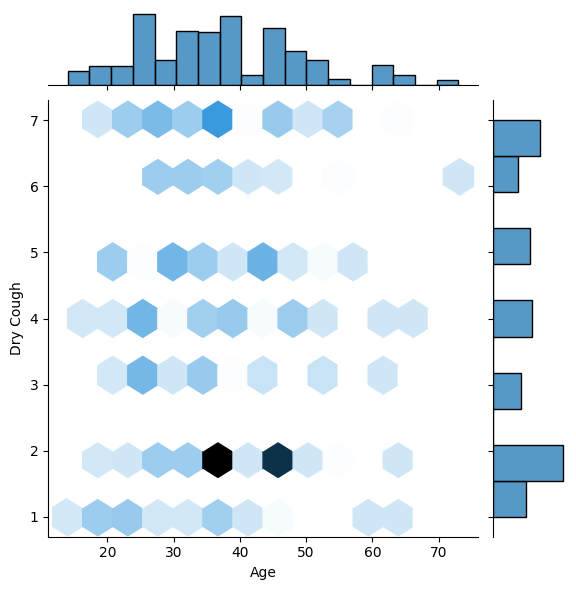

In [ ]:
sns.jointplot(x=df['Age'],y=df["Dry Cough"],kind="hex")

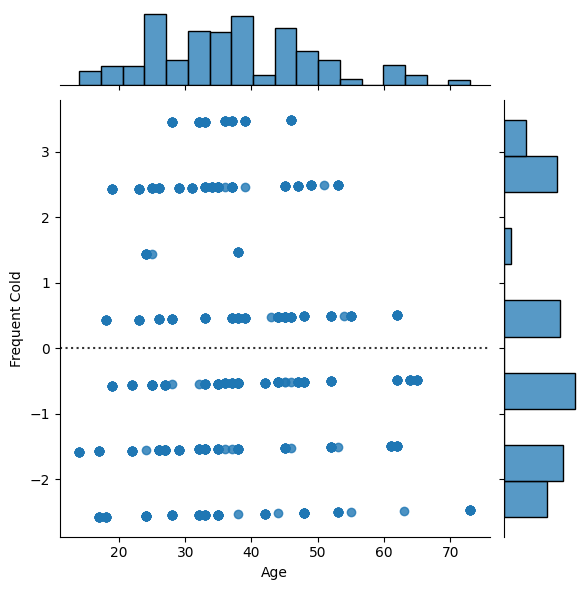

In [ ]:
sns.jointplot(x=df['Age'],y=df["Frequent Cold"],kind="resid")

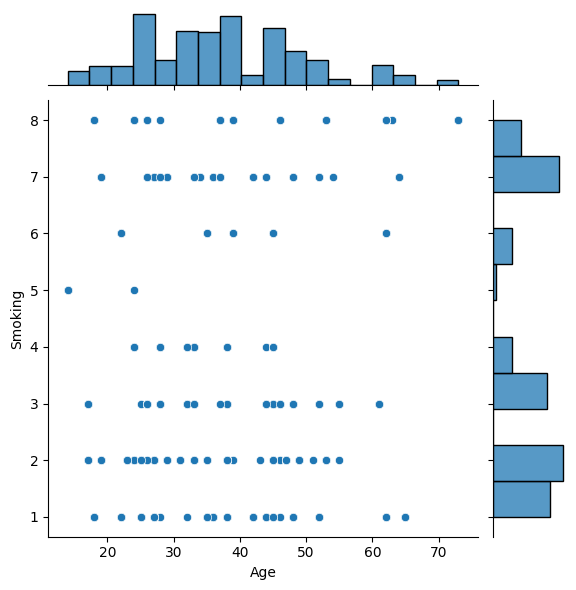

In [ ]:
sns.jointplot(x=df['Age'],y=df["Smoking"],kind="scatter")

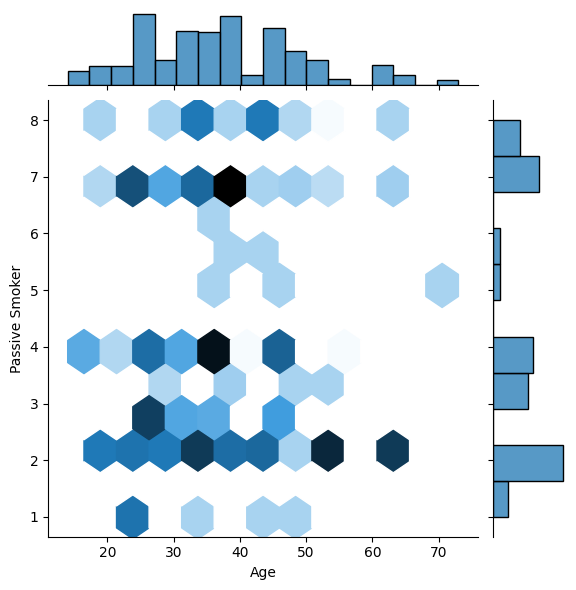

In [ ]:
sns.jointplot(x=df['Age'],y=df["Passive Smoker"],kind="hex")

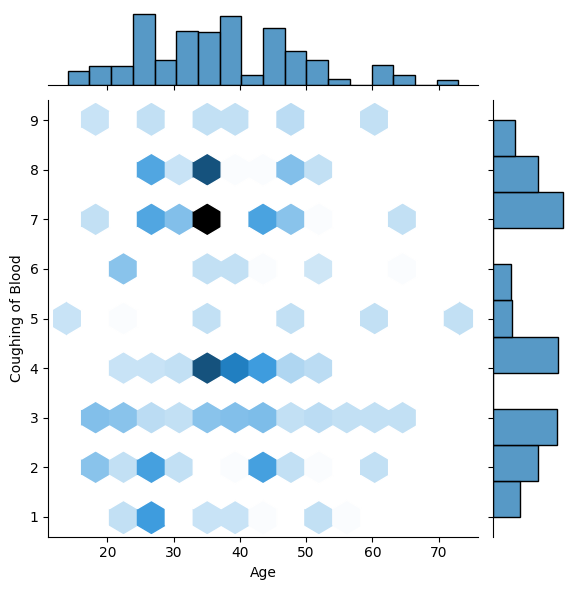

In [ ]:


sns.jointplot(x=df['Age'],y=df["Coughing of Blood"],kind="hex")


In [ ]:
# prompt: chest pain

df.corrwith(df["Chest Pain"])


<ipython-input-176-8b0619ae4e32>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["Chest Pain"])


index                       0.022210
Age                         0.012864
Gender                     -0.218426
Air Pollution               0.585734
Alcohol use                 0.717242
Dust Allergy                0.639983
OccuPational Hazards        0.775619
Genetic Risk                0.831751
chronic Lung Disease        0.782646
Balanced Diet               0.798207
Obesity                     0.673150
Smoking                     0.647926
Passive Smoker              0.696077
Chest Pain                  1.000000
Coughing of Blood           0.712158
Fatigue                     0.251135
Weight Loss                -0.001092
Shortness of Breath         0.237045
Wheezing                    0.107211
Swallowing Difficulty       0.071784
Clubbing of Finger Nails    0.081386
Frequent Cold               0.042937
Dry Cough                   0.142180
Snoring                     0.140036
dtype: float64

<ipython-input-175-30761c80b499>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')


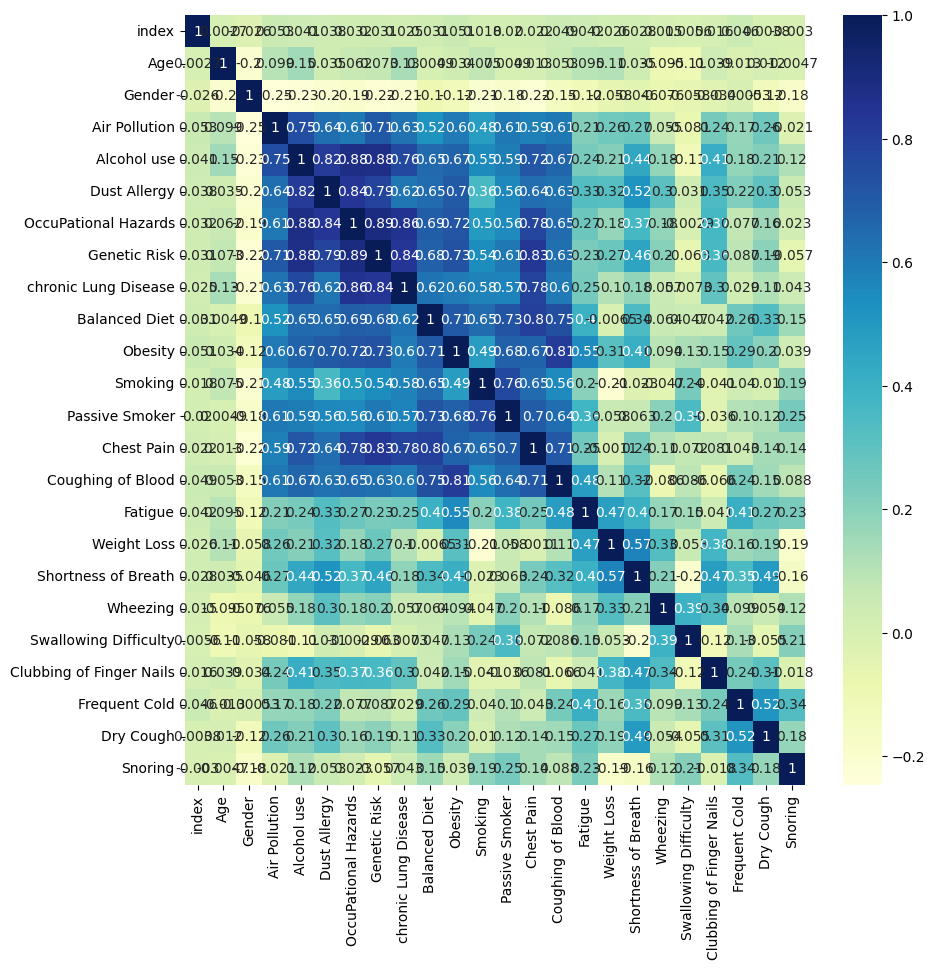

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

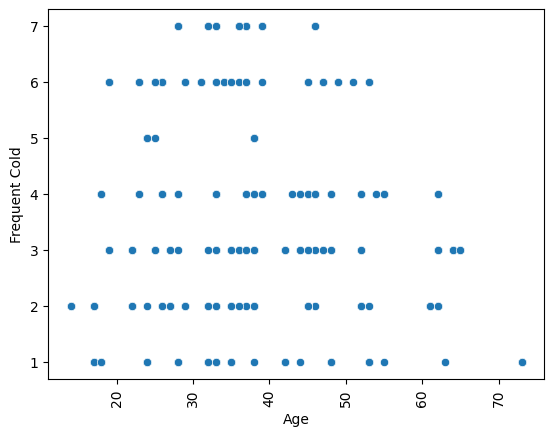

In [ ]:
sns.scatterplot(x=df["Age"],y=df["Frequent Cold"])
plt.xticks(rotation=90)

In [ ]:
msk=np.random.rand(len(df))<0.8

In [ ]:
train=df[msk]
test=df[~msk]

In [ ]:
lm=LinearRegression()

### **TRAINING** **DATA**

In [ ]:
x=np.asanyarray(train[["Chest Pain","Coughing of Blood","Shortness of Breath","Wheezing"]])

In [ ]:
y=np.asanyarray(train[["chronic Lung Disease"]])

In [ ]:
lm.fit(x,y)

LinearRegression()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

array([[1, 1, 3, 2],
       [3, 3, 6, 5],
       [7, 7, 2, 7],
       ...,
       [6, 5, 3, 2],
       [7, 8, 3, 1],
       [7, 7, 6, 7]])

In [ ]:
y_train

array([[2],
       [2],
       [6],
       [2],
       [6],
       [4],
       [6],
       [6],
       [6],
       [4],
       [6],
       [4],
       [3],
       [5],
       [1],
       [3],
       [1],
       [4],
       [3],
       [2],
       [4],
       [2],
       [3],
       [6],
       [3],
       [2],
       [6],
       [2],
       [2],
       [6],
       [2],
       [6],
       [4],
       [4],
       [6],
       [4],
       [2],
       [1],
       [5],
       [4],
       [6],
       [2],
       [4],
       [3],
       [7],
       [4],
       [6],
       [1],
       [3],
       [6],
       [6],
       [7],
       [1],
       [6],
       [4],
       [6],
       [4],
       [7],
       [3],
       [2],
       [3],
       [6],
       [7],
       [3],
       [6],
       [2],
       [7],
       [4],
       [7],
       [5],
       [6],
       [3],
       [6],
       [6],
       [6],
       [5],
       [3],
       [2],
       [7],
       [3],
       [6],
       [2],
       [7],
    

In [ ]:
x_test

array([[7, 7, 6, 7],
       [2, 4, 3, 4],
       [2, 4, 2, 5],
       [7, 6, 4, 6],
       [6, 6, 2, 4],
       [3, 3, 6, 5],
       [2, 3, 7, 3],
       [4, 3, 6, 5],
       [2, 4, 2, 5],
       [4, 2, 3, 4],
       [7, 7, 2, 7],
       [3, 3, 6, 5],
       [3, 4, 2, 4],
       [7, 7, 5, 7],
       [7, 7, 2, 7],
       [3, 3, 6, 5],
       [2, 4, 3, 4],
       [2, 4, 2, 2],
       [2, 4, 2, 2],
       [4, 8, 9, 2],
       [2, 2, 7, 7],
       [7, 7, 5, 6],
       [7, 7, 6, 7],
       [7, 7, 5, 7],
       [3, 4, 2, 2],
       [4, 2, 3, 4],
       [6, 5, 2, 1],
       [1, 2, 1, 3],
       [6, 2, 1, 2],
       [4, 8, 9, 2],
       [1, 4, 1, 2],
       [3, 4, 2, 4],
       [1, 5, 3, 2],
       [7, 8, 3, 1],
       [7, 9, 4, 1],
       [7, 7, 5, 6],
       [7, 9, 4, 1],
       [1, 1, 3, 2],
       [4, 3, 6, 5],
       [4, 3, 6, 5],
       [3, 4, 2, 4],
       [2, 2, 7, 7],
       [3, 6, 2, 3],
       [2, 4, 2, 5],
       [4, 4, 4, 6],
       [2, 2, 1, 3],
       [4, 3, 6, 5],
       [7, 9,

In [ ]:
y_test

array([[6],
       [1],
       [3],
       [6],
       [4],
       [2],
       [5],
       [6],
       [3],
       [2],
       [6],
       [2],
       [4],
       [6],
       [6],
       [2],
       [1],
       [2],
       [2],
       [4],
       [2],
       [6],
       [6],
       [6],
       [6],
       [2],
       [5],
       [5],
       [3],
       [4],
       [2],
       [4],
       [1],
       [7],
       [6],
       [6],
       [6],
       [2],
       [6],
       [6],
       [4],
       [2],
       [1],
       [3],
       [3],
       [1],
       [6],
       [6],
       [4],
       [7],
       [6],
       [3],
       [3],
       [4],
       [5],
       [1],
       [2],
       [2],
       [4],
       [6],
       [3],
       [4],
       [5],
       [7],
       [2],
       [7],
       [3],
       [3],
       [2],
       [7],
       [2],
       [5],
       [2],
       [7],
       [3],
       [7],
       [2],
       [2],
       [2],
       [5],
       [2],
       [7],
       [2],
    

In [ ]:
lm.coef_

array([[ 0.5858161 ,  0.08093481, -0.00398495,  0.00135024]])

In [ ]:
lm.intercept_

array([1.37731745])

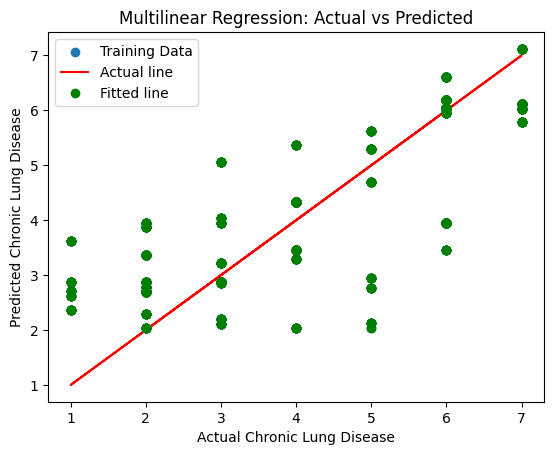

In [ ]:
plt.scatter(y_train, lm.predict(x_train), label="Training Data")
plt.plot(y_train, y_train, '-r', label='Actual line')
plt.plot(y_train, lm.predict(x_train), 'og', label='Fitted line')
plt.xlabel("Actual Chronic Lung Disease")
plt.ylabel("Predicted Chronic Lung Disease")
plt.title("Multilinear Regression: Actual vs Predicted")
plt.legend()

### **TESTING** **DATA**

In [ ]:
x_test=np.asanyarray(test[["Chest Pain","Coughing of Blood","Shortness of Breath","Wheezing"]])
y_hat=lm.predict(test[["Chest Pain","Coughing of Blood","Shortness of Breath","Wheezing"]])
y_test=np.asanyarray(test[["chronic Lung Disease"]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


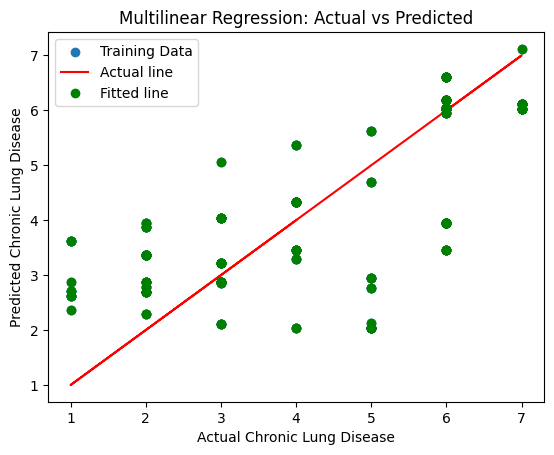

In [ ]:
plt.scatter(y_test,y_hat, label="Training Data")
plt.plot(y_test,y_test, '-r', label='Actual line')
plt.plot(y_test, lm.predict(x_test), 'og', label='Fitted line')
plt.xlabel("Actual Chronic Lung Disease")
plt.ylabel("Predicted Chronic Lung Disease")
plt.title("Multilinear Regression: Actual vs Predicted")
plt.legend()

In [ ]:
print("Mean Squared Error (MSE): %.2f" %np.mean((y_test - y_hat)**2))

Mean Squared Error (MSE): 1.70


In [ ]:
print("Variance score:%.2f"%lm.score(x_test,y_test))


Variance score:0.50


In [ ]:
print("R2_Score:%.2f"%r2_score(y_hat,y_test))

R2_Score:0.20


In [ ]:
prediction=y_hat
prediction

array([[4.30185385],
       [5.39490737],
       [3.86758385],
       [4.66519412],
       [6.14154032],
       [3.32371881],
       [6.08035183],
       [5.78350534],
       [3.21874963],
       [3.95633896],
       [2.14123074],
       [3.49104404],
       [2.26776363],
       [2.08422433],
       [2.71869147],
       [2.40749607],
       [3.9827642 ],
       [3.32371881],
       [6.56905745],
       [3.48501496],
       [2.90453969],
       [3.90117955],
       [3.90117955],
       [6.05207959],
       [5.99993472],
       [4.30185385],
       [4.30185385],
       [6.21291381],
       [4.30185385],
       [3.21874963],
       [6.14154032],
       [5.31519588],
       [2.63409227],
       [6.56905745],
       [2.91358331],
       [5.93157577],
       [2.14123074],
       [3.90117955],
       [2.90453969],
       [2.63409227],
       [2.90453969],
       [3.32371881],
       [5.99993472],
       [6.14154032],
       [5.99993472],
       [5.96818602],
       [6.21291381],
       [5.999

## **Decision Tree**


In [ ]:
x=df.drop(columns=["chronic Lung Disease","index","Patient Id","Level"])

In [ ]:
x

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,4,3,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,6,7,2,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,7,7,8,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,7,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,7,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,6,7,2,...,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,7,7,8,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
y=df["chronic Lung Disease"]
y

0      2
1      2
2      4
3      7
4      6
      ..
995    6
996    6
997    4
998    6
999    4
Name: chronic Lung Disease, Length: 1000, dtype: int64

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(x,y)

DecisionTreeClassifier()

In [ ]:
tree.export_graphviz(model,out_file="Lung_Cancer_Analysis.dot",feature_names=["	Age","Gender","Air Pollution","Alcohol use","Dust Allergy","OccuPational Hazards","Genetic Risk","Obesity","Balanced Diet","Blood Pressure","Smoking","Coughing of Blood","Fatigue","Shortness of Breath","Wheezing","Swallowing Difficulty","Clubbing of Finger Nails","Frequent Cold","Dry Cough","	Snoring","	Weight Loss","Passive Smoker"],class_names=sorted(y.unique()),label="all",rounded=True,filled=True)


TypeError: ignored

### **KMean**

In [ ]:
from sklearn.cluster import KMeans




In [ ]:
num_clusters = 3

In [ ]:
data_for_clustering = df[["chronic Lung Disease","Wheezing", 'Coughing of Blood']]

In [ ]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [ ]:
kmeans.fit(data_for_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['cluster'] = kmeans.labels_

<ipython-input-28-d2257b9883a2>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('cluster').mean()


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
cluster,,,,,,,,,,,,,,,,,,,,,
0,503.513423,37.855705,1.365772,4.617450,6.023490,6.228188,6.194631,5.765101,5.590604,6.194631,...,7.234899,4.500000,3.342282,5.073826,1.969799,2.694631,3.197987,3.802013,4.583893,2.983221
1,491.996262,37.013084,1.476636,2.788785,2.934579,4.093458,3.485981,3.183178,3.145794,2.831776,...,2.885981,2.889720,3.783178,3.616822,3.885981,3.770093,4.031776,3.228037,3.401869,2.818692
2,516.377246,36.473054,1.227545,5.820359,7.173653,6.700599,6.760479,6.940120,6.173653,6.766467,...,6.940120,5.802395,5.000000,4.748503,6.652695,5.544910,4.868263,4.047904,3.994012,3.167665


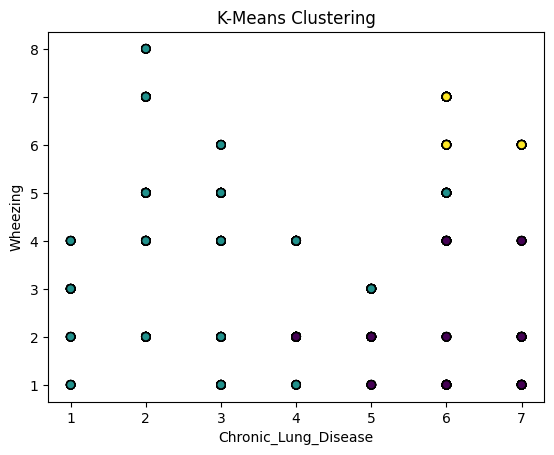

In [ ]:
plt.scatter(df['chronic Lung Disease'], df['Wheezing'], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering')
plt.xlabel('Chronic_Lung_Disease')
plt.ylabel('Wheezing')


df.groupby('cluster').mean()


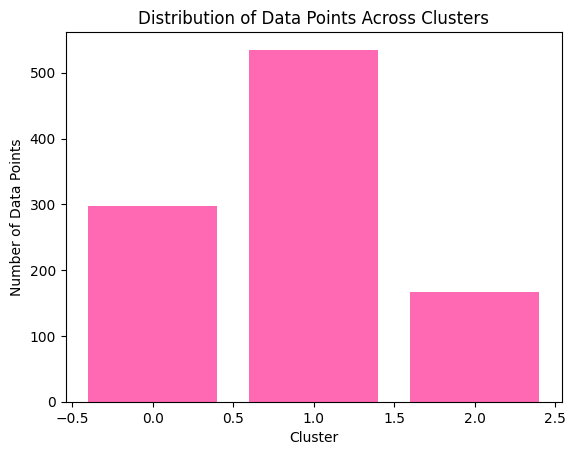

In [ ]:
cluster_counts = df['cluster'].value_counts().sort_index()

plt.bar(cluster_counts.index, cluster_counts.values, color='hotpink')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()